# CAR PRICE PREDICTION


### Problem Statement:
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-

### 1. Data Collection Phase
I have scrapped data of used cars from website www.cardekho.com where I found more features of cars compared to other websites and I fetch data for different locations using web scrapping . As per the requirement of our client we need to build the model to predict the prices of these used cars.

### 2. Model Building Phase
After collecting the data, I need to build a machine learning model. Before model building we need to do all data pre-processing steps. The complete life cycle of data science that I have used in this project are as follows:

Data Cleaning

Exploratory Data Analysis

Data Pre-processing

Model Building

Model Evaluation

Selecting the best model

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
from scipy.stats import zscore  
from sklearn.preprocessing import PowerTransformer 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from xgboost import XGBClassifier

In [3]:
#getting data
os.chdir("C:\GitBash\Files")
df = pd.read_excel("Used_Cars.xlsx")

In [4]:
df.head(5)

,Unnamed: 0,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,...,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,0,2019 Maruti Swift,Petrol,"11,241 kms",1197,Manual,21.21 kmpl,5,White,81.80,...,Drum,268,1530,1735,3840,1315,NaN,-,https://www.cardekho.com/used-cars+in+ahmedabad,6.19 Lakh
1,1,2018 Maruti Alto K10,Petrol,"27,994 kms",998,Manual,23.95 kmpl,5,Superior white,67.05,...,Drum,177,1475,1515,3545,1210,NaN,145 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,3.45 Lakh
2,2,2016 Maruti Swift,Diesel,"80,728 kms",1248,Manual,25.2 kmpl,5,Silver,74,...,Drum,204-liters,1530,1735,3840,1405,NaN,155 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.80 Lakh
3,3,2015 Maruti SX4 S Cross,Diesel,"46,390 kms",1598,Manual,22.7 kmpl,5,Urban Blue,118,...,Solid Disc,353-litres,1590,1765,4300,1740,NaN,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,6.35 Lakh
4,4,2019 Jeep Compass,Petrol,"32,294 kms",1368,Automatic,16 kmpl,5,Grey,160.77,...,Discs,408-litres,1640,1818,4395,-,NaN,186.69 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,17.05 Lakh


In [5]:
df.sample(5)

,Unnamed: 0,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,...,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
5129,5129,2011 Toyota Etios,Petrol,"49,713 kms",1496,Manual,17.6 kmpl,5,Silver,88.73,...,-,-,-,-,-,-,6.5,-,https://www.cardekho.com/used-cars+in+delhi-ncr,2.55 Lakh
1926,1926,2019 Mercedes-Benz GLS,Diesel,"54,000 kms",2987,Automatic,11 kmpl,7,Grey,258,...,Disc,680-Liters,1850,2141,5130,3250,-,222 kmph,https://www.cardekho.com/used-cars+in+mumbai,64.00 Lakh
5414,5414,2014 Mahindra XUV500,Diesel,"72,000 kms",2179,Manual,15.1 kmpl,7,White,140,...,Disc & Caliper Type,-,1785,1890,4585,2450,-,175 kmph,https://www.cardekho.com/used-cars+in+delhi-ncr,6.50 Lakh
7465,7465,2012 Hyundai i20,Diesel,"92,934 kms",1396,Manual,21.9 kmpl,5,Red,88.76,...,Disc,-,1505,1710,3995,-,-,-,https://www.cardekho.com/used-cars+in+chennai,3.80 Lakh
1246,1246,2020 Kia Sonet,Petrol,"18,644 kms",998,Automatic,18.3 kmpl,5,Black,118.36,...,Drum,392,1642,1790,3995,-,-,-,https://www.cardekho.com/used-cars+in+bangalore,14.85 Lakh


In [6]:
df.tail(5)



,Unnamed: 0,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,...,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
10743,10743,2010 Maruti 800,Petrol,"70,000 kms",796,Manual,16.1 kmpl,4,White,37,...,Drum,-,1405,1440,3335,1000,-,144km/hr,https://www.cardekho.com/used-cars+in+lucknow,67500
10744,10744,2012 Tata Indica,Diesel,"32,000 kms",1405,Manual,19.4 kmpl,5,White,70,...,Drum,232-litre,1550,1695,3795,-,-,-,https://www.cardekho.com/used-cars+in+lucknow,1.50 Lakh
10745,10745,2005 Hyundai Santro,Petrol,"50,000 kms",999,Manual,-,5,Black,-,...,-,-,-,-,-,-,-,-,https://www.cardekho.com/used-cars+in+lucknow,65000
10746,10746,2017 Hyundai Creta,Diesel,"25,000 kms",1582,Manual,19.67 kmpl,5,-,126.2,...,Drum,400-litres,1630,1780,4270,-,-,190 Kmph,https://www.cardekho.com/used-cars+in+lucknow,10.50 Lakh
10747,10747,2022 Maruti Alto 800 tour,Petrol,"20,000 kms",796,Manual,-,5,Other,47.33,...,Drum,-,1475,1490,3445,1185,-,-,https://www.cardekho.com/used-cars+in+lucknow,2.43 Lakh


In [7]:
#shape of data
df.shape

(10748, 21)

In [8]:
df.columns

Index(['Unnamed: 0', 'Car_Name', 'Fuel_type', 'Running_in_kms', 'Endine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'cargo_volume',
       'height', 'width', 'length', 'Weight', 'Insp_score', 'top_speed',
       'City_url', 'Car_price'],
      dtype='object')

## DATA DESCRIPTION



Serial No		Variable		Definition

1		Car_Name	-	Name of the cars with manufacturing year

2		Fuel_type	-	Type of fuel used for car engine

3		Running_in_kms	-	Car running in kms till the date

4		Engine_disp	-	Engine displacement/engine CC

5		Gear_transmission	-	Type of gear transmission used in car

6		Milage_in_km/ltr	=	Overall milage of car in Km/ltr

7		Seating_cap	-	Number of seats available in the car

8		color		-     Color of the car

9		Max_power	-	Maximum power of engine used in car in bhp

10		front_brake_type	-	Type of brake system used for front-side wheels

11		rear_brake_type	-	Type of brake system used for back-side wheels

12		cargo_volume	-	Total cubic feet of space in a car's cargo area

13		height	-	Total height of car in mm

14		width	-	Width of car in mm

15		length	-	Total length of the car in mm


16		Weight	-	Gross weight of the car in kg

17		Insp_score	-	Inspection rating out of 10

18		top_speed	-	Maximum speed limit of the car in km per hours

19		City_url	-	Url of the page of cars from a particular city/location

20		Car_price	-	Price of the car

## EXPLORATORY DATA ANALYSIS

In [9]:
#displaying maximum columns in the dataset
pd.set_option("display.max_columns",None)
# To display maximum rows in the dataset
pd.set_option("display.max_rows",None)

In [10]:
#Dropping unwanted column
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()   # Displaying the dataframe


,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,2019 Maruti Swift,Petrol,"11,241 kms",1197,Manual,21.21 kmpl,5,White,81.80,Disc,Drum,268,1530,1735,3840,1315,NaN,-,https://www.cardekho.com/used-cars+in+ahmedabad,6.19 Lakh
1,2018 Maruti Alto K10,Petrol,"27,994 kms",998,Manual,23.95 kmpl,5,Superior white,67.05,Ventilated Disc,Drum,177,1475,1515,3545,1210,NaN,145 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,3.45 Lakh
2,2016 Maruti Swift,Diesel,"80,728 kms",1248,Manual,25.2 kmpl,5,Silver,74,Ventilated Disc,Drum,204-liters,1530,1735,3840,1405,NaN,155 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.80 Lakh
3,2015 Maruti SX4 S Cross,Diesel,"46,390 kms",1598,Manual,22.7 kmpl,5,Urban Blue,118,Ventilated Disc,Solid Disc,353-litres,1590,1765,4300,1740,NaN,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,6.35 Lakh
4,2019 Jeep Compass,Petrol,"32,294 kms",1368,Automatic,16 kmpl,5,Grey,160.77,Disc,Discs,408-litres,1640,1818,4395,-,NaN,186.69 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,17.05 Lakh


In [11]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
Car_Name,1445
Fuel_type,5
Running_in_kms,4449
Endine_disp,143
Gear_transmission,2
Milage_in_km/ltr,511
Seating_cap,9
color,393
Max_power,486
front_brake_type,28


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10748 entries, 0 to 10747
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           10748 non-null  object
 1   Fuel_type          10748 non-null  object
 2   Running_in_kms     10748 non-null  object
 3   Endine_disp        10748 non-null  object
 4   Gear_transmission  10748 non-null  object
 5   Milage_in_km/ltr   10748 non-null  object
 6   Seating_cap        10748 non-null  object
 7   color              10748 non-null  object
 8   Max_power          10748 non-null  object
 9   front_brake_type   10748 non-null  object
 10  rear_brake_type    10748 non-null  object
 11  cargo_volume       10748 non-null  object
 12  height             10748 non-null  object
 13  width              10748 non-null  object
 14  length             10748 non-null  object
 15  Weight             10748 non-null  object
 16  Insp_score         8720 non-null   objec

## DATA PREPROCESSING

From our dataset we can notice most of the columns contains corrupted values so that we need to go through lot of data-processing steps. Let's do some of the pre-processing methods on our dataset.

From the dataset we can observe there are some columns having values with "-" sign, so we will treat them as NAN values. Let's take a quick look at the columns having "-" sign by using below code.

In [13]:
# Checking which columns contains "-" sign 
df[df.columns[(df == '-').any()]].nunique()

Endine_disp         143
Milage_in_km/ltr    511
Seating_cap           9
color               393
Max_power           486
front_brake_type     28
rear_brake_type      28
cargo_volume        332
height              303
width               290
length              396
Weight              313
Insp_score           10
top_speed           296
dtype: int64

In [14]:
#Displaying the columns containing "-" sign count and their % i.e. ((count of "-")/10748)/100
unwanted_value = pd.DataFrame(df.isin(["-"]).sum().sort_values(ascending=False))
unwanted_value.columns=['Count of "-"']
unwanted_value['% of "-" sign']=unwanted_value['Count of "-"']/107.48     # 10748)/100 = 107.48
unwanted_value

,"Count of ""-""","% of ""-"" sign"
Insp_score,8644,80.424265
Weight,5643,52.502791
top_speed,3834,35.671753
cargo_volume,1895,17.631187
Milage_in_km/ltr,310,2.884258
width,204,1.898028
height,201,1.870115
length,201,1.870115
rear_brake_type,186,1.730555
front_brake_type,184,1.711946


In [15]:
df.isna().sum()

Car_Name                0
Fuel_type               0
Running_in_kms          0
Endine_disp             0
Gear_transmission       0
Milage_in_km/ltr        0
Seating_cap             0
color                   0
Max_power               0
front_brake_type        0
rear_brake_type         0
cargo_volume            0
height                  0
width                   0
length                  0
Weight                  0
Insp_score           2028
top_speed              74
City_url                0
Car_price               0
dtype: int64

2028 null values present in column Insp_score

In [16]:
# Replacing the sign as NAN values
df.replace('-',np.nan, inplace = True)
df.replace('null ',np.nan, inplace = True)

In [17]:
df.isna().sum()

Car_Name                 0
Fuel_type                0
Running_in_kms           0
Endine_disp             71
Gear_transmission        0
Milage_in_km/ltr       310
Seating_cap             73
color                   81
Max_power              146
front_brake_type       184
rear_brake_type        186
cargo_volume          1895
height                 201
width                  204
length                 201
Weight                5643
Insp_score           10672
top_speed             3908
City_url                 0
Car_price                0
dtype: int64

The columns "Insp_score" and "Weight" have more than 50% of "-" sign and null values. So, we will drop those columns. And we will treat the remaining columns having these sign as NAN values, so that we can easily treat them using appropriate imputation techniques.

In [18]:
#Dropping the columns having more than 50% of "-" sign
df.drop(["Insp_score", "Weight"],axis=1,inplace=True)

## FEATURE ENGINEERING

The column Car_Name is containing manufacturing year of the car, Brand name of the car and model name of the car. So, I will be extracting 3 different columns from the column Car_Name.

#### Car_Name

In [19]:



# Extracting the feature "Manufacturing_year" from Car_Name column
df['Manufacturing_year'] = df['Car_Name'].str[0:4]

# Creating car_name column and storing the remaining values other than year in it. 
df['Car_name'] = df['Car_Name'].str[4:]

# Dropping Car_Name column as I have stored the data in car_name column instead
df.drop(columns = 'Car_Name', axis=1, inplace = True)


In [20]:
# Extracting Brand and Model from Car_name column
df['Brand'] = df.Car_name.str.split(' ').str.get(1)
df['Model'] = df.Car_name.str.split(' ').str[2:]
df['Model'] = df['Model'].apply(lambda x: ','.join(map(str, x)))
df['Model'] = df['Model'].str.replace(',',' ')
df.drop(columns = 'Car_name', axis=1, inplace = True)     # Dropping Car_name column after extraction


In [21]:
# Moving the columns Model, Brand and Manufacturing_year to the first, second & third position of dataframe respectively
df.insert(0, 'Model',df.pop('Model'))
df.insert(1, 'Brand',df.pop('Brand'))
df.insert(2, 'Manufacturing_year',df.pop('Manufacturing_year'))
df.head()

,Model,Brand,Manufacturing_year,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,top_speed,City_url,Car_price
0,Swift,Maruti,2019,Petrol,"11,241 kms",1197,Manual,21.21 kmpl,5,White,81.80,Disc,Drum,268,1530,1735,3840,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,6.19 Lakh
1,Alto K10,Maruti,2018,Petrol,"27,994 kms",998,Manual,23.95 kmpl,5,Superior white,67.05,Ventilated Disc,Drum,177,1475,1515,3545,145 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,3.45 Lakh
2,Swift,Maruti,2016,Diesel,"80,728 kms",1248,Manual,25.2 kmpl,5,Silver,74,Ventilated Disc,Drum,204-liters,1530,1735,3840,155 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.80 Lakh
3,SX4 S Cross,Maruti,2015,Diesel,"46,390 kms",1598,Manual,22.7 kmpl,5,Urban Blue,118,Ventilated Disc,Solid Disc,353-litres,1590,1765,4300,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,6.35 Lakh
4,Compass,Jeep,2019,Petrol,"32,294 kms",1368,Automatic,16 kmpl,5,Grey,160.77,Disc,Discs,408-litres,1640,1818,4395,186.69 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,17.05 Lakh


As we can see, we have successfully extracted the features Manufacturing_year, Brand and Model from Car_name column and moved these columns from last position to starting position of the dataframe using insert() method.

#### Running_in_kms

The column "Running_in_kms" is showing object data type since it is having some string value like kms, and "," sign in it. But it should be continuous data so, I will remove string value "kms" and the comma sign "," by replacing them with empty space and then convert the column into float data type.

In [22]:
#Replacing kms and "," sign by empty space from the column
df['Running_in_kms'] = df['Running_in_kms'].str.replace('kms','')
df['Running_in_kms'] = df['Running_in_kms'].str.replace(',','')

In [23]:
#Converting object data type into float data type
df['Running_in_kms'] = df['Running_in_kms'].astype('float')

I have successfully converted string values and comma sign from the column and also converted object data type of "Running_in_kms" column into float data type.



#### Car_price

The target variable "Car_price" should be continuous data but due to some string values like "Lakh", "Cr" and "," it is showing as object data type. So, we will replace 'Lakh' by 100000, 'Cr' by 10000000 and "," by empty space. Then we will split it into two columns as price_a and price_b, where price_a column to be having numerical entries (like 5.50, 4.50 etc) which are present in the Car_price column and price_b column to be having string values like "Lakh", "Cr". That is storing numerical values in price_a column and string values in price_b column and after that multiply these two columns to get exact car price in numerical format.

In [26]:
#replacing string values and "," sign 
df['Car_Price'] = df['Car_price'].str.replace('Lakh','100000')
df['Car_Price'] = df['Car_Price'].str.replace(',','')
df['Car_Price'] = df['Car_Price'].str.replace('Cr','10000000')

In [27]:
#Splitting the column into two columns
df[['price_a','price_b']] = df.Car_Price.str.split(expand=True)

In [28]:
# Converting object data type into float data type
df['price_a'] = df['price_a'].astype('float')
df['price_b'] = df['price_b'].astype('float')

In [29]:
#Checking null values to confirm if the target column contains any missing values after splitting it
print("No of null values in price_a is:",df.price_a.isnull().sum())
print("No of null values in price_b is:",df.price_b.isnull().sum())


No of null values in price_a is: 0
No of null values in price_b is: 104


As we can observe there are 104 missing values in the column after splitting target variable. As the column price_b contains string values like "Lakh" and "Cr" so, we will fill the null values by 1.

In [30]:
# Filling null values in price_b column by 1
df['price_b']=df['price_b'].fillna(value = 1)

In [31]:
#Multiplying the two columns to get exact price of the car
df['Car_Price'] = df['price_a'] * df['price_b']

 we have got our target variable cleaned and it is continuous also having float data type. Let's drop the unwanted columns which I have created to get the exact price.

In [32]:
#Dropping unwanted columns
df.drop(columns = ['Car_price','price_a','price_b'], axis=1, inplace = True)

In [33]:
#Checking dataframe after cleaning target column
df.head()


,Model,Brand,Manufacturing_year,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,top_speed,City_url,Car_Price
0,Swift,Maruti,2019,Petrol,11241.0,1197,Manual,21.21 kmpl,5,White,81.80,Disc,Drum,268,1530,1735,3840,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,619000.0
1,Alto K10,Maruti,2018,Petrol,27994.0,998,Manual,23.95 kmpl,5,Superior white,67.05,Ventilated Disc,Drum,177,1475,1515,3545,145 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,345000.0
2,Swift,Maruti,2016,Diesel,80728.0,1248,Manual,25.2 kmpl,5,Silver,74,Ventilated Disc,Drum,204-liters,1530,1735,3840,155 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,480000.0
3,SX4 S Cross,Maruti,2015,Diesel,46390.0,1598,Manual,22.7 kmpl,5,Urban Blue,118,Ventilated Disc,Solid Disc,353-litres,1590,1765,4300,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,635000.0
4,Compass,Jeep,2019,Petrol,32294.0,1368,Automatic,16 kmpl,5,Grey,160.77,Disc,Discs,408-litres,1640,1818,4395,186.69 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,1705000.0


#### Milage_in_km/ltr

The column "Milage_in_km/ltr" is also having some string values like "kmpl", "km/kg" and "km/hr" so, I will be removing/ replacing by empty space and converting column from object data type into float data type.

In [34]:
#Replacing string values by empty space
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('kmpl','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/kg','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/hr','')
#Converting object data type into float data type
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].astype('float')

#### City_url

The column City_url contains the urls of the cities, so we will create a new column as Location by replacing the urls by specific city name.

In [35]:
#Checking the value count of the column City_url
df.City_url.value_counts()

https://www.cardekho.com/used-cars+in+mumbai       1740
https://www.cardekho.com/used-cars+in+delhi-ncr    1700
https://www.cardekho.com/used-cars+in+gurgaon      1184
https://www.cardekho.com/used-cars+in+pune         1035
https://www.cardekho.com/used-cars+in+hyderabad     967
https://www.cardekho.com/used-cars+in+chennai       930
https://www.cardekho.com/used-cars+in+ahmedabad     815
https://www.cardekho.com/used-cars+in+kolkata       787
https://www.cardekho.com/used-cars+in+jaipur        592
https://www.cardekho.com/used-cars+in+bangalore     520
https://www.cardekho.com/used-cars+in+lucknow       312
https://www.cardekho.com/used-cars+in+agra          166
Name: City_url, dtype: int64

In [36]:
# Let's convert the urls into city name 

df['Location'] = df.City_url.replace('https://www.cardekho.com/used-cars+in+mumbai', 'Mumbai')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+delhi-ncr', 'Delhi_NCR')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+gurgaon', 'Gurgaon')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+pune', 'Pune')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+hyderabad', 'Hyderabad')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+chennai', 'Chennai')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+ahmedabad', 'Ahmedabad')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+kolkata', 'Kolkata')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+jaipur', 'Jaipur')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+bangalore', 'Bangalore')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+lucknow', 'Lucknow')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+agra', 'Agra')


In [37]:
# Checking the value counts of Location
df.Location.value_counts()

Mumbai       1740
Delhi_NCR    1700
Gurgaon      1184
Pune         1035
Hyderabad     967
Chennai       930
Ahmedabad     815
Kolkata       787
Jaipur        592
Bangalore     520
Lucknow       312
Agra          166
Name: Location, dtype: int64

In [38]:
df.drop(columns = 'City_url', axis=1, inplace = True)

#### max_power

The column "Max_power" contains some string values like PS, ps, Bh and P. Let's replace them as well and we will convert this column to float datatype.

In [39]:
# Getting numerical values from column "Max_power" and replacing the string values
df["Max_power"] = df["Max_power"].str[0:5]

df["Max_power"] = df["Max_power"].str.replace("PS",'')
df["Max_power"] = df["Max_power"].str.replace("ps",'')
df["Max_power"] = df["Max_power"].str.replace("Bh",'')
df["Max_power"] = df["Max_power"].str.replace("P",'')
df["Max_power"] = df["Max_power"].str.replace("rpm",'')
df["Max_power"] = df["Max_power"].str.replace("at",'')
df["Max_power"] = df["Max_power"].str.replace("RPM",'')
df["Max_power"] = df["Max_power"].str.replace("HP",'')
df["Max_power"] = df["Max_power"].str.replace("kW",'')

In [40]:
df["Max_power"] = df["Max_power"].str.replace("[",'')
df["Max_power"] = df["Max_power"].str.replace("]",'')
df["Max_power"] = df["Max_power"].str.replace("(",'')
df["Max_power"] = df["Max_power"].str.replace(")",'')

In [41]:
df["Max_power"] = df["Max_power"].str.replace("H",'')

In [42]:
df["Max_power"] = df["Max_power"].str.replace("s",'')

In [43]:
df["Max_power"] = df["Max_power"].str.replace("h",'')

In [44]:
df['Max_power'] = df['Max_power'].str[0:4]

In [45]:
df["Max_power"] = df["Max_power"].str.replace("p",'')

In [46]:
# Converting Max_power into float datatype
df.Max_power = df.Max_power.astype('float')

We have replaced string values present in the column Max_power and converted it into float data type as well.

#### front_brake_type

We have replaced string values present in the column Max_power and converted it into float data type as well.

In [47]:
# Checking the value count of the column "front_brake_type"
df.front_brake_type.value_counts()

Disc                                          6540
Ventilated Disc                               3557
Solid Disc                                     116
Ventilated Discs                                77
Disc & Caliper Type                             67
Disk                                            58
Ventilated DIsc                                 22
Ventilated discs                                20
Vantilated Disc                                 17
Drum                                            12
Disc,internally ventilated                      12
Multilateral Disc                               11
Ventilated Disk                                 10
Disc & Drum                                      9
Ventlated Disc                                   7
Disc, 236 mm                                     5
Discs                                            5
Electric Parking Brake                           5
Disc brakes                                      3
disc                           

From the value count of the column "front_brake_type" we can observe some of the entries having similar categories, let's group them according to their category.



In [48]:
# Grouping the entries which are similar to Disc 
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("Disc & Caliper Type","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)
df["front_brake_type"].replace("Disc, 236 mm","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)
df["front_brake_type"].replace("Disc brakes","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)

# Grouping the entries which are similar to Ventilated Discs 
df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("ventilated disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)


In [49]:
# Checking the value counts of the column after grouping
df["front_brake_type"].value_counts()

Disc                                          6796
Ventilated Disc                               3714
Drum                                            12
Disc,internally ventilated                      12
Multilateral Disc                               11
Disc & Drum                                      9
Electric Parking Brake                           5
Single Piston Sliding Caliper, Vented Disc       2
Booster assisted ventilated disc                 1
M Sport Brakes                                   1
ABS                                              1
Name: front_brake_type, dtype: int64

In [50]:
#### rear_brake_type

In [51]:
# Checking the value counts of the column "rear_brake_type"
df.rear_brake_type.value_counts()

Drum                                          7796
Disc                                          1765
Ventilated Disc                                356
Solid Disc                                     247
Discs                                           99
Disc & Caliper Type                             67
Leading-Trailing Drum                           52
Self-Adjusting Drum                             31
Leading & Trailing Drum                         30
Ventilated Discs                                23
Drums                                           20
Ventilated discs                                20
Disc & Drum                                     12
Ventilated Drum                                  9
Self Adjusting Drum                              6
Electric Parking Brake                           5
Drum in Discs                                    5
Drums 180 mm                                     5
drum                                             2
ventilated disc                

With the help of value count funtion we can notice some of the entries in the column "rear_brake_type" having similar categories, let's group them.

In [52]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)
df["rear_brake_type"].replace("Drums 180 mm","Drum",inplace=True)
df["rear_brake_type"].replace("Drum`","Drum",inplace=True)

df["rear_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["rear_brake_type"].replace("Discs","Disc",inplace=True)

df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("ventilated disc","Ventilated Disc",inplace=True)

df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)

df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("self adjusting drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)


In [53]:
# Checking the value counts of the column after grouping
df.front_brake_type.value_counts()

Disc                                          6796
Ventilated Disc                               3714
Drum                                            12
Disc,internally ventilated                      12
Multilateral Disc                               11
Disc & Drum                                      9
Electric Parking Brake                           5
Single Piston Sliding Caliper, Vented Disc       2
Booster assisted ventilated disc                 1
M Sport Brakes                                   1
ABS                                              1
Name: front_brake_type, dtype: int64

In [54]:
#Engine_disp

In [55]:
# Renaming "Endine_disp" to "Engine_disp"
df.rename(columns = {'Endine_disp':'Engine_disp'}, inplace = True)

In [56]:
# Converting "Engine_disp" column from object to float data type as it is containing continuous data
df.Engine_disp = df.Engine_disp.astype('float')

In [57]:
#height

In [58]:
# Replacing
df['height'] = df['height'].str.replace('Â ','')

In [59]:
# Replacing "," sign by empty space and "-" by in the column "height"
df['height'] = df['height'].str.replace(',','')

In [60]:
# Getting numerical entries
df['height'] = df['height'].str[0:4]   

In [61]:
# Converting the column into float data type
df.height = df.height.astype('float')

In [62]:
# width & length

In [63]:
# Replacing "," sign by empty space in the columns "width" & "length"
df['width'] = df['width'].str.replace(',','')
df['length'] = df['length'].str.replace(',','')

In [64]:
# Converting the columns into float data type
df.width = df.width.astype('float')
df.length = df.length.astype('float')

In [65]:
#cargo_volume

In [66]:
# replacing
df['cargo_volume'] = df['cargo_volume'].str.replace('-liters','')
df['cargo_volume'] = df['cargo_volume'].str.replace('Liters','')
df['cargo_volume'] = df['cargo_volume'].str.replace('Litres','')
df['cargo_volume'] = df['cargo_volume'].str.replace('-litres','')
df['cargo_volume'] = df['cargo_volume'].str.replace('Lit','')
df['cargo_volume'] = df['cargo_volume'].str.replace('-litre','')
df['cargo_volume'] = df['cargo_volume'].str.replace('litre','')
df['cargo_volume'] = df['cargo_volume'].str.replace('liter','')
df['cargo_volume'] = df['cargo_volume'].str.replace('liters','')
df['cargo_volume'] = df['cargo_volume'].str.replace('Litre','')
df['cargo_volume'] = df['cargo_volume'].str.replace('-Litre','')
df['cargo_volume'] = df['cargo_volume'].str.replace('-liters','')
df['cargo_volume'] = df['cargo_volume'].str.replace('L','')
df['cargo_volume'] = df['cargo_volume'].str.replace('Liter','')
df['cargo_volume'] = df['cargo_volume'].str.replace('-',' ')
df['cargo_volume'] = df['cargo_volume'].str.replace(',','')

In [67]:
# Getting numerical values from cargo_volume column
df['cargo_volume'] = df['cargo_volume'].str[0:4]
df['cargo_volume'] = df['cargo_volume'].str.replace('r','')
df['cargo_volume'] = df['cargo_volume'].str.replace('s','')

In [68]:
# Converting the column into float datatype
df.cargo_volume = df.cargo_volume.astype('float')

In [69]:
#top_speed


In [70]:
# Getting numerical values from "top_speed" column
df['top_speed'] = df['top_speed'].str[0:3]

# Converting column into float datatype
df.top_speed = df.top_speed.astype('float')

In [71]:
#Seating_cap


In [72]:
# Converting Seating_cap to float data type
df.Seating_cap = df.Seating_cap.astype('float')

In [73]:
#Manufacturing_year


In [74]:
# Checking the value counts of the column "Manufacturing_year"
df.Manufacturing_year.value_counts()

2017    1364
2018    1283
2016    1158
2015    1094
2014     964
2019     915
2013     743
2020     645
2012     574
2021     558
2011     438
2010     298
2009     197
2007     127
2008     126
2022     105
2006      62
2005      29
2004      19
2003      17
2002      13
2001       7
2000       3
1997       3
1998       2
1996       1
1990       1
1999       1
1995       1
Name: Manufacturing_year, dtype: int64

In [75]:
# Converting the column into float datatype
df.Manufacturing_year = df.Manufacturing_year.astype('float')

# Subtracting the Manufacturing_year from year 2021 to extract the column "Car_age" 
df['Car_age'] = 2022 - df['Manufacturing_year']

# Dropping the column "Manufacturing_year" as we have extracted age of the cars
df.drop(columns = 'Manufacturing_year', inplace = True)

In [76]:
# Checking the datatypes of the columns
df.dtypes


Model                 object
Brand                 object
Fuel_type             object
Running_in_kms       float64
Engine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap          float64
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
cargo_volume         float64
height               float64
width                float64
length               float64
top_speed            float64
Car_Price            float64
Location              object
Car_age              float64
dtype: object

In [77]:
# Saving the cleaned data into excel file
df.to_excel("edited_used_cars_data.xlsx")

### NULL VALUES

In [78]:
# Displaying the columns containing null values count and their % i.e. ((count of null)/10748)/100

df_null = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum().sort_values(ascending=False))
df_null.columns=['Count of Null Values']
df_null['% of Null Values']=df_null['Count of Null Values']/107.48     # 10748/100 = 107.48
df_null

,Count of Null Values,% of Null Values
top_speed,3908,36.360253
cargo_volume,1895,17.631187
Milage_in_km/ltr,310,2.884258
width,204,1.898028
height,201,1.870115
length,201,1.870115
rear_brake_type,186,1.730555
front_brake_type,184,1.711946
Max_power,146,1.358392
color,81,0.753629


Above are the columns containing missing values. We will treat these null values using appropriate imputation techniques.

### SKEWNESS

In [79]:
df.skew()

Running_in_kms      14.780797
Engine_disp          1.487357
Milage_in_km/ltr     1.845181
Seating_cap          2.151064
Max_power           31.569402
cargo_volume         1.632590
height               1.150386
width                0.794837
length               0.170583
top_speed            0.632041
Car_Price            4.442976
Car_age              0.815128
dtype: float64

The following columns

Engine_disp
Milage_in_km/ltr
Max_power
height
width
length
cargo_volume and
top_speed have continuous data and contains more skewness and outliers so that we can fill the null values with median in these columns except the column "length" which has no outliers so, we can fill the missing values with mean.
The remaining columns such as

Seating_cap
color
front_brake_type and
rear_brake_type have categorical data so that we can replace the null values with most frequently occurred values that is mode value.

In [80]:
# Checking mean value of the column "length"
print("The mean value of 'length' is:",df["length"].mean())

# Checking the median values of the columns "Engine_disp", "Milage_in_km/ltr", "Max_power", "height", "width", "cargo_volume" and "top_speed"
print("\nThe median value of 'Engine_disp' is:",df["Engine_disp"].median())
print("The median value of 'Milage_in_km/ltr' is:",df["Milage_in_km/ltr"].median())
print("The median value of 'Max_power' is:",df["Max_power"].median())
print("The median value of 'height' is:",df["height"].median())
print("The median value of 'width' is:",df["width"].median())
print("The median value of 'cargo_volume' is:",df["cargo_volume"].median())
print("The median value of 'top_speed' is:",df["top_speed"].median())

# Checking the mode values of the categorical columns
print("\nThe mode value of 'Seating_cap' is:",df["Seating_cap"].mode())
print("The mode value of 'color' is:",df["color"].mode())
print("The mode value of 'front_brake_type' is:",df["front_brake_type"].mode())
print("The mode value of 'rear_brake_type' is:",df["rear_brake_type"].mode())

The mean value of 'length' is: 4178.4449606523185

The median value of 'Engine_disp' is: 1396.0
The median value of 'Milage_in_km/ltr' is: 18.6
The median value of 'Max_power' is: 97.6
The median value of 'height' is: 1530.0
The median value of 'width' is: 1734.0
The median value of 'cargo_volume' is: 375.0
The median value of 'top_speed' is: 172.0

The mode value of 'Seating_cap' is: 0    5.0
dtype: float64
The mode value of 'color' is: 0    White
dtype: object
The mode value of 'front_brake_type' is: 0    Disc
dtype: object
The mode value of 'rear_brake_type' is: 0    Drum
dtype: object


In [81]:
#TREATING NULL VALUES

In [82]:
# Filling null values in the column "length" by mean value as it does not contains any outliers and skewness
df["length"] = df["length"].fillna(df["length"].mean())

# Filling null values in the remaining numerical columns using median values as these columns contains outliers 
for i in ['Engine_disp','Milage_in_km/ltr','height','Max_power','width','length','cargo_volume','top_speed']:
    df[i] = df[i].fillna(df[i].median())
    
# Filling null values in the categorical columns using mode values
for j in ['Seating_cap','front_brake_type','rear_brake_type','color']:
    df[j] = df[j].fillna(df[j].mode()[0])

In [87]:
# Checking missing values after using imputation techniques
df.isnull().sum()

Model                0
Brand                0
Fuel_type            0
Running_in_kms       0
Engine_disp          0
Gear_transmission    0
Milage_in_km/ltr     0
Seating_cap          0
color                0
Max_power            0
front_brake_type     0
rear_brake_type      0
cargo_volume         0
height               0
width                0
length               0
top_speed            0
Car_Price            0
Location             0
Car_age              0
dtype: int64

We have successfully imputed the null values using mean, median and mode methods.

In [84]:
#Checking whether the target column contains any space in it
df.loc[df['Car_Price']==" "]

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,top_speed,Car_Price,Location,Car_age


In [85]:
# Checking the uniqueness of target column
df["Car_Price"].unique()

array([619000., 345000., 480000., ...,  55000.,  37000.,  67500.])

In [86]:
# Checking the dimensions of the dataset after cleaning
print("Shape of the dataset is:",df.shape)

Shape of the dataset is: (10748, 20)


### statistical summary

In [88]:
df.describe()

,Running_in_kms,Engine_disp,Milage_in_km/ltr,Seating_cap,Max_power,cargo_volume,height,width,length,top_speed,Car_Price,Car_age
count,1.074800e+04,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,1.074800e+04,10748.000000
mean,5.544121e+04,1523.778563,18.810567,5.269352,118.281783,380.018701,1578.386677,1745.625233,4178.444961,175.826200,1.028223e+06,6.398214
std,4.427871e+04,531.760302,3.988625,0.759373,251.537236,128.157808,123.214383,136.074485,413.552429,22.874304,1.347341e+06,3.548513
min,1.450000e+02,0.000000,7.080000,2.000000,25.500000,29.000000,1281.000000,1410.000000,3099.000000,81.000000,3.000000e+04,0.000000
25%,3.044950e+04,1197.000000,16.470000,5.000000,81.800000,296.000000,1490.000000,1682.000000,3920.000000,165.000000,3.850000e+05,4.000000
50%,5.109800e+04,1396.000000,18.600000,5.000000,97.600000,375.000000,1530.000000,1734.000000,4160.000000,172.000000,6.050000e+05,6.000000
75%,7.300000e+04,1798.000000,21.100000,5.000000,126.000000,465.000000,1645.000000,1811.000000,4456.000000,180.000000,1.050000e+06,8.000000
max,2.171000e+06,5998.000000,120.000000,10.000000,9066.000000,1780.000000,1995.000000,2220.000000,5462.000000,312.000000,1.720000e+07,32.000000


The describe() method gives the statistical information of the dataset. The summary of this dataset looks perfect since there are no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things

The counts of every column is same which means there are no missing values present in the dataset as we have already treated them.
The min value for "Engine_disp", and "Car_age" is 0, which is not realistic. And looking at the maximum values for columns "Running_in_kms", "Engine_disp", "Max_power", "width", "length", "cargo_volume", "top_speed" and "Car_Price" we can say that there are huge outliers present in our data.
The mean value is greater than the median(50%) in the columns such as "Milage_in_km/ltr", "Engine_disp", "Max_power", "length", "cargo_volume", "top_speed" and "Car_Price" have high differences which means these columns are skewed to right.
We need to remove these outliers and skewness except target column using appropriate methods before building our machine learning models.

In [89]:
# Separating numerical and categorical columns in the dataset

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['Model', 'Brand', 'Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Location']

Numerical columns present in the dataset are:
 ['Running_in_kms', 'Engine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'cargo_volume', 'height', 'width', 'length', 'top_speed', 'Car_Price', 'Car_age']


## DATA VISUALIZATION

In [90]:
###Univariate Analysis

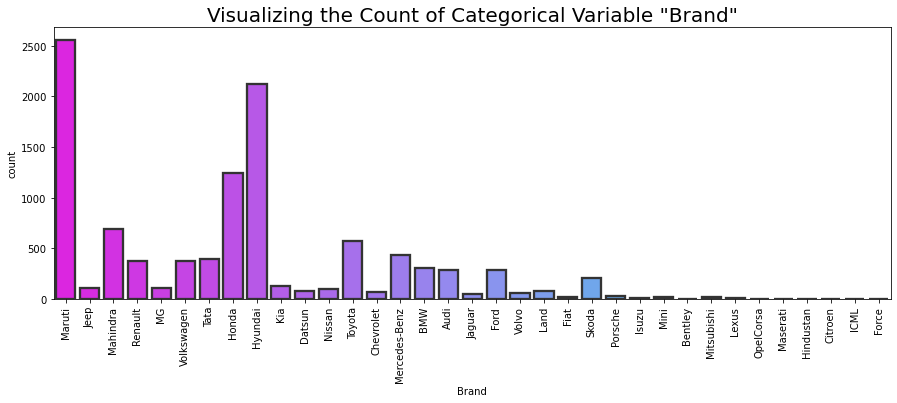

In [91]:
# Plotting count plot for categorical variable "Brand" of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "Brand"',fontsize=20)
sns.countplot(df['Brand'],palette = "cool_r", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

The above count plot gives the count of cars' brand. From the graph we can conclude that we are having most of the cars from Maruti and Hyundai brand as the count is high for these brands.

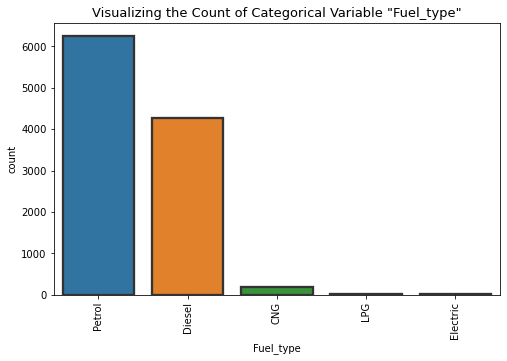

In [92]:
# Plotting count plot for categorical variable "Fuel_type" of the used cars
plt.figure(figsize=(8,5))

plt.title('Visualizing the Count of Categorical Variable "Fuel_type"',fontsize=13)
sns.countplot(df['Fuel_type'], linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()


The above plot gives the count of fuel types used by the cars. More number of cars are using petrol followed by diesel as fuel. And very few cars uses CNG, LPG and Electricity as fuel type.

Manual       7548
Automatic    3200
Name: Gear_transmission, dtype: int64


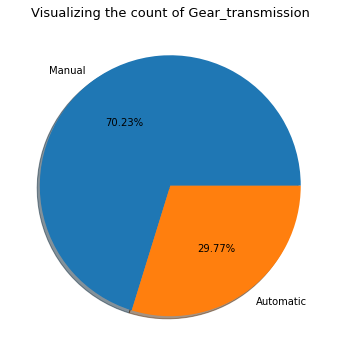

In [93]:
# Visualizing the count of Gear_transmission of the car 
print(df["Gear_transmission"].value_counts())
labels='Manual','Automatic'
colors = ["#4CAF50", "hotpink"]
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Gear_transmission'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.title("Visualizing the count of Gear_transmission",fontsize=13)
plt.show()

The above plot gives the count of transmission, from this graph we can notice that around 70.23% of the cars are with Manual gear transmission system and only 29.77% of the cars are with Automatic gear transmission system.

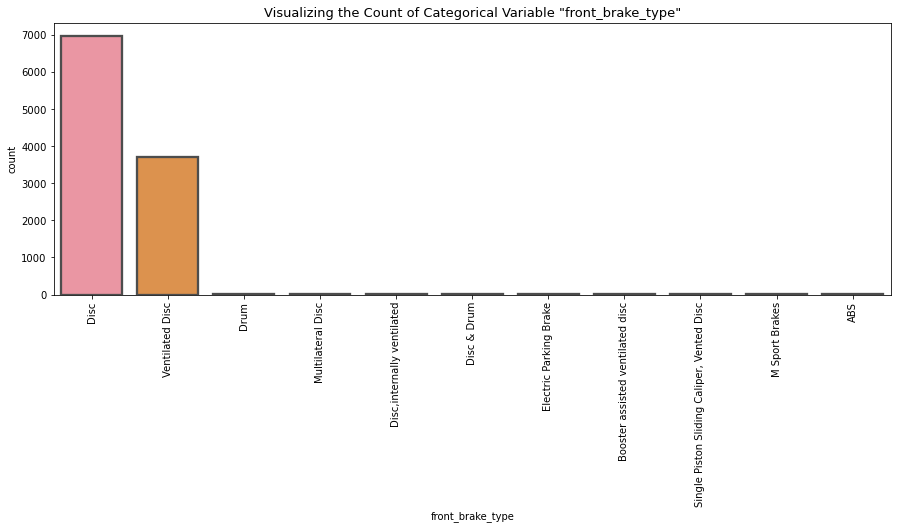

In [94]:
# Visualizinf the counts of front_brake_type of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "front_brake_type"',fontsize=13)
sns.countplot(df['front_brake_type'], linewidth=2.3, edgecolor=".3")
plt.xticks(rotation=90)
plt.show()


By visualizing the above count plot we can conclude that the cars with Disc and Ventilated Disc type of brake system used for front-side wheels are having high count compared to other brake types.

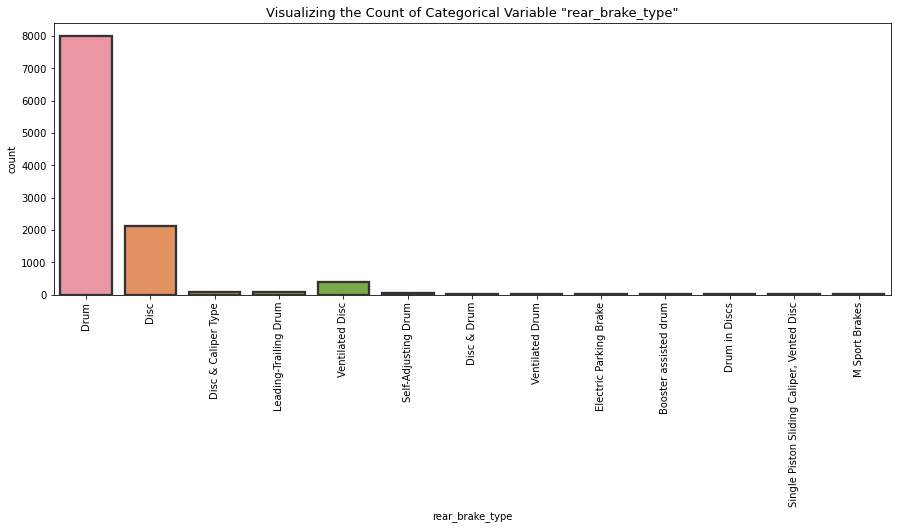

In [95]:
# Visualizinf the counts of rear_brake_type of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "rear_brake_type"',fontsize=13)
sns.countplot(df['rear_brake_type'], linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

The above graph represents the count of rear_brake_type of the cars which shows that the cars having Drum type of brake system used for back-side wheels are having high count of around 8000 compared to other type of rear brakes.

Mumbai       1740
Delhi_NCR    1700
Gurgaon      1184
Pune         1035
Hyderabad     967
Chennai       930
Ahmedabad     815
Kolkata       787
Jaipur        592
Bangalore     520
Lucknow       312
Agra          166
Name: Location, dtype: int64


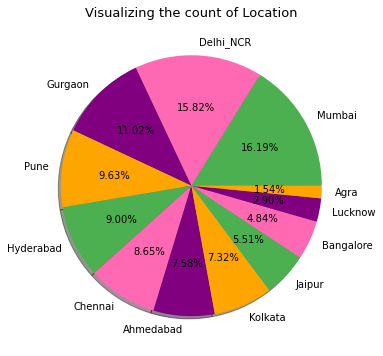

In [97]:
# Visualizing the count of Location of the car 
print(df["Location"].value_counts())
labels='Mumbai','Delhi_NCR','Gurgaon','Pune','Hyderabad','Chennai','Ahmedabad','Kolkata','Jaipur','Bangalore','Lucknow','Agra'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Location'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title("Visualizing the count of Location",fontsize=13)
plt.show()


By looking at the above count plot we can get to know that the cars from the city Delhi_NCR and Mumbai have high counts which are almost similar. And the other locations have varying counts.

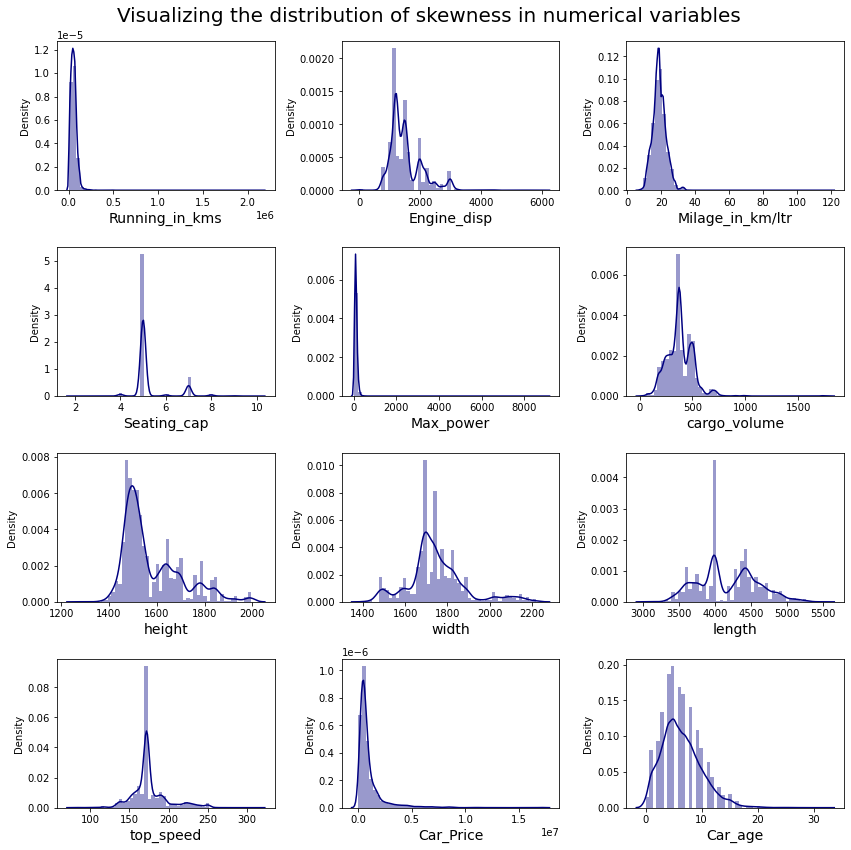

In [98]:
# PLOTTING NUMERICAL VARIABLE

# Checking how the data has been distriubted in each column

plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color="navy")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

Above plot shows how the data has been distributed in each of the columns.

From the distribution plots we can observe most of the columns are not normally distributed, only the columns "Milage_in_km/ltr" looks somewhat normal.
Also, we can notice the columns like "Running_in_kms", "Engine_disp", "Milage_in_km/ltr", "Seating_cap", "Max_power", "cargo_volume", "height", "width", "length", "top_speed", "Car_Price", "Car_age" etc are skewed to right as the mean value in these columns are much greater than the median(50%).
We need to remove this skewness before building our machine learning models.

In [100]:
#### Bivariate Analysis

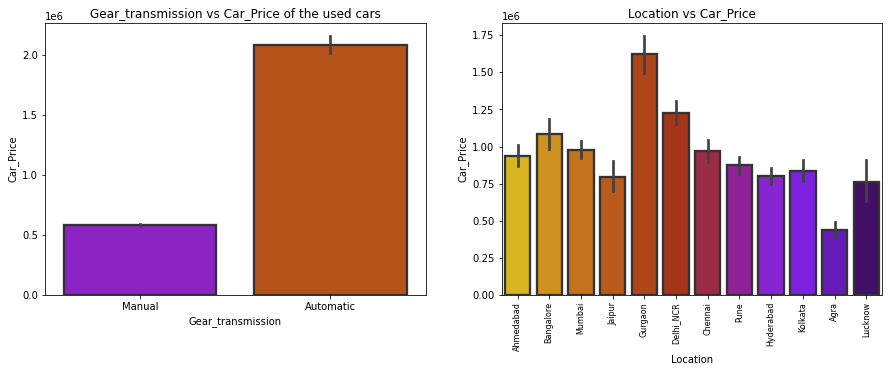

In [101]:
###Visualizing Categorical Variables vs Car_Price


plt.figure(figsize=(15,5))

# Comparing Car_Price and Gear_transmission of the used cars
plt.subplot(1,2,1)
sns.barplot(df['Gear_transmission'],df['Car_Price'],palette="gnuplot", linewidth=2.3, edgecolor=".2");
plt.title('Gear_transmission vs Car_Price of the used cars')

# Comparing Car_Price and Location of the used cars
plt.subplot(1,2,2)
sns.barplot(df['Location'],df['Car_Price'],palette="gnuplot_r", linewidth=2.3, edgecolor=".2");
plt.title('Location vs Car_Price')
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

Car_Price vs Gear_transmission: From the bar plot we can observe that the cars which have Automatic gear transmission system are having high price compared to the cars which have Manual gear transmission system.

Car_Price vs Location: From the second plot we came to know that the old cars from the city Gurgaon have higher price followed by Delhi_NCR and Bangalore. And the cars from the cities Agra, Jaipur, Lucknow etc have very less price.

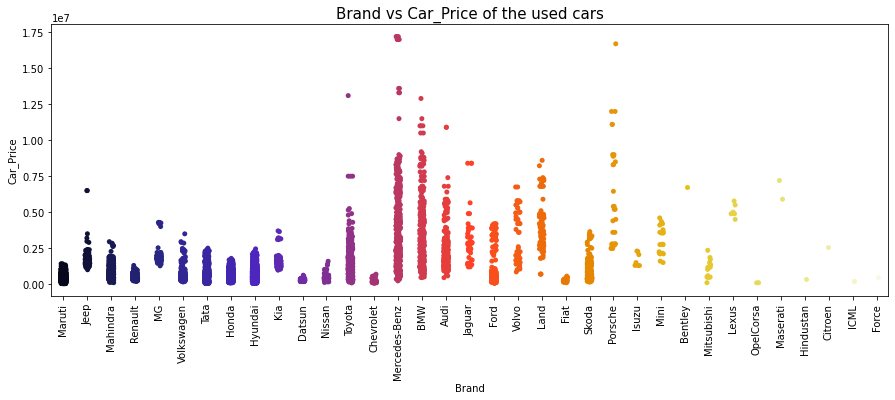

In [102]:
# Comparing Car_Price and Brand of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Brand'],df['Car_Price'],palette="CMRmap");
plt.title('Brand vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Car_Price vs Brand: The above strip plot shows how the used car prices changes depending on Brands. Here the cars from Mercedes_Benz and BMW brand have high price compared to other brands.

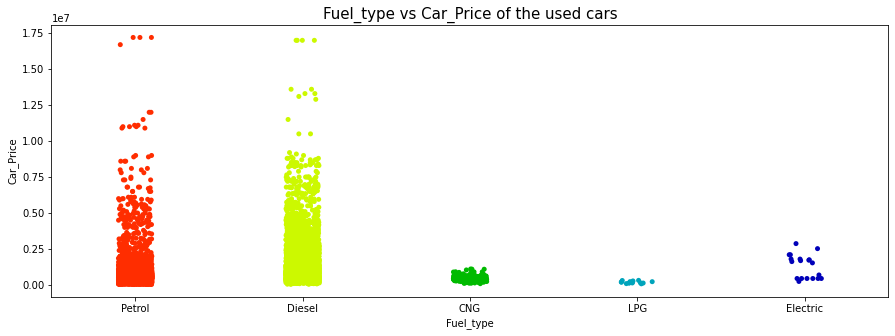

In [103]:
# Comparing Car_Price and Fuel_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Fuel_type'],df['Car_Price'],palette="nipy_spectral_r");
plt.title('Fuel_type vs Car_Price of the used cars',fontsize=15)
plt.show()

Car_Price vs Fuel_type: From the graph we can conclude that more number of cars are using Petrol and Diesel fuels and these cars have wide range of price from minimum to maximum. And very few of the cars uses CNG, LPG, and Electricity as fuel type which are not much expensive when compared to that of the diesel and petrol cars.

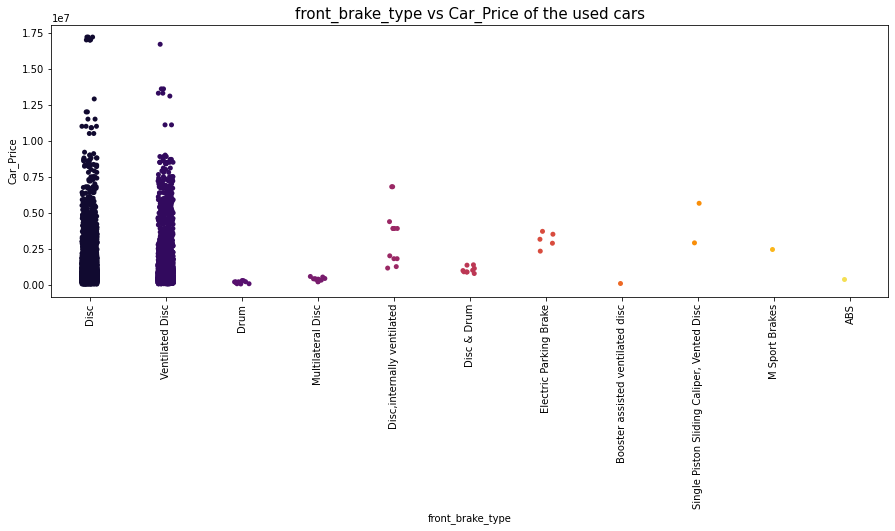

In [104]:
# Comparing Car_Price and front_brake_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['front_brake_type'],df['Car_Price'],palette="inferno");
plt.title('front_brake_type vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()


Car_Price vs front_brake_type: Looking at the above bar plot for front_brake_type vs Car_Price we can say that the cars with Disc and Ventilated Disc system for front wheels are having higher prices than other type of braking systems.

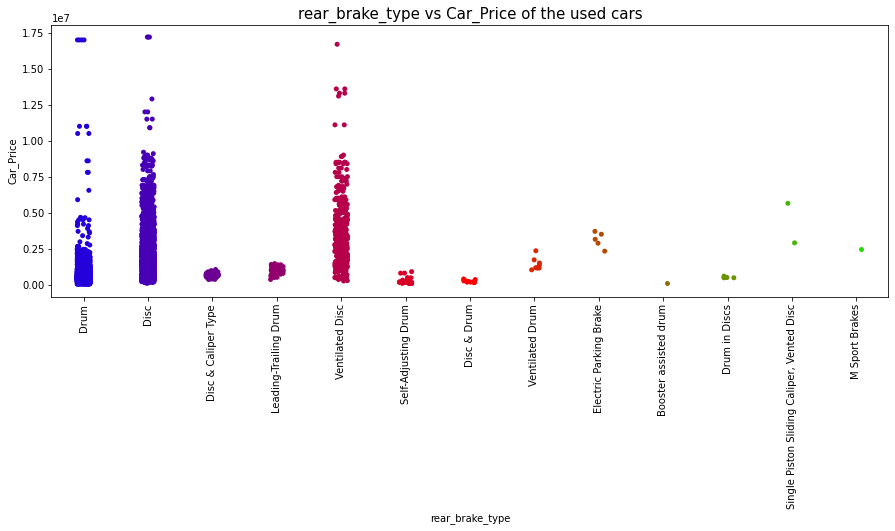

In [105]:
# Comparing Car_Price and rear_brake_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['rear_brake_type'],df['Car_Price'],palette="brg");
plt.title('rear_brake_type vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Car_Price vs rear_brake_type: The above graph is representing a barplot for rear_brake_type vs Car_Price which tells us that the cars having Ventilated Disc, Disc and Drum brake system are having higher prices than the cars with other type of braking system at rear side.

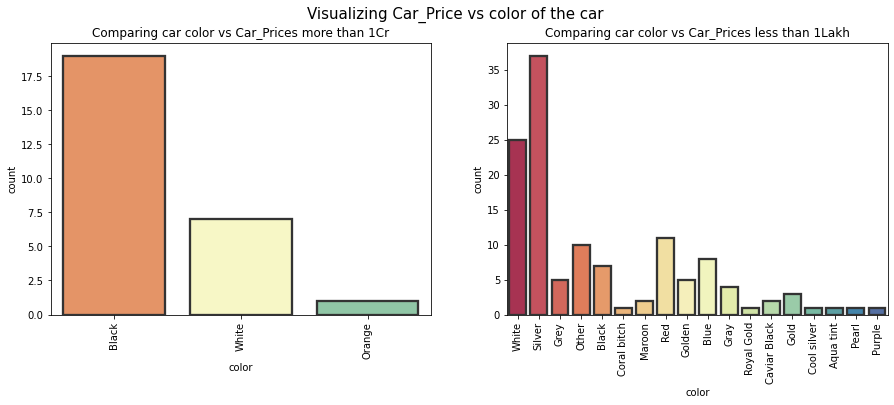

In [106]:
plt.figure(figsize = (15,5))
plt.suptitle("Visualizing Car_Price vs color of the car",fontsize=15)
plt.subplot(1,2,1)
plt.title("Comparing car color vs Car_Prices more than 1Cr")
sns.countplot(x = 'color', data = df.loc[df['Car_Price']>= 10000000], palette='Spectral',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title("Comparing car color vs Car_Prices less than 1Lakh")
sns.countplot(x = 'color', data = df.loc[df['Car_Price']<= 100000], palette='Spectral',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.show()

Car_Price vs color: The first count plot is for the car color vs Car_Prices more than 1 Cr. The plot shows the colors of expensive cars. The Black color cars are more expensive compared to the cars with other colors.

The second graph is for the car color vs car prices below 1 Lakh and it shows the colors of cars which are cheap. From the plot we can say the cars with Silver color and white color have less price

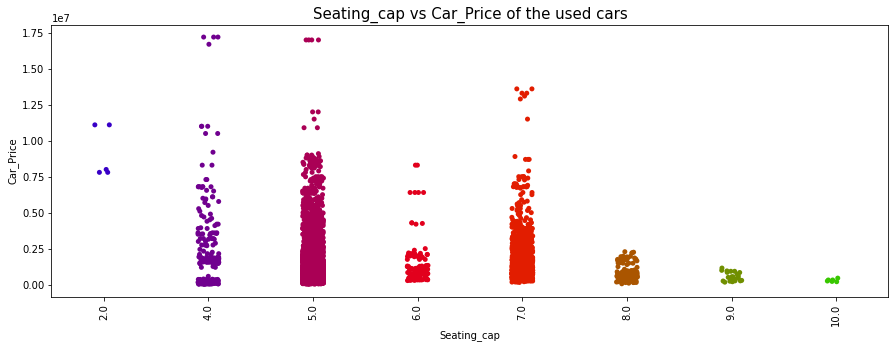

In [107]:
# Comparing Car_Price and Seating_cap of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Seating_cap'],df['Car_Price'],palette="brg");
plt.title('Seating_cap vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Car_Price vs Seating_cap: Most of the cars have seating capacity of 5, 7 and 4 and these cars having higher prices than other cars. And only few cars are observed with the seating capacity of 10.

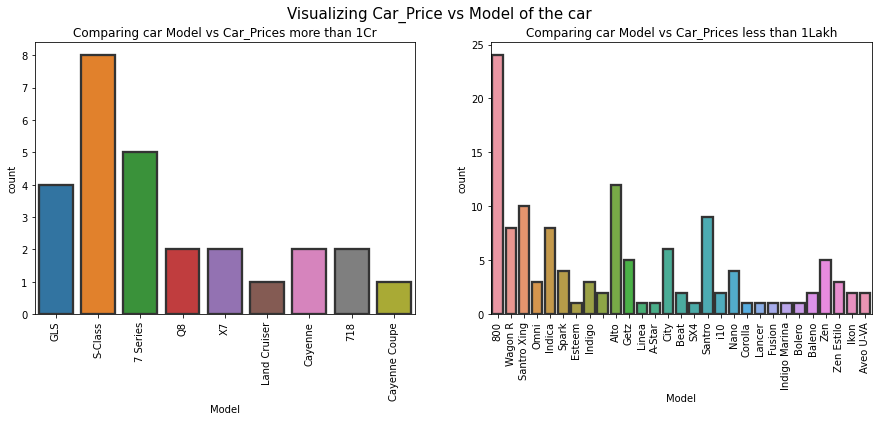

In [109]:
plt.figure(figsize = (15,5))
plt.suptitle("Visualizing Car_Price vs Model of the car",fontsize=15)
plt.subplot(1,2,1)
plt.title("Comparing car Model vs Car_Prices more than 1Cr")
sns.countplot(x = 'Model', data = df.loc[df['Car_Price']>= 10000000],linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title("Comparing car Model vs Car_Prices less than 1Lakh")
sns.countplot(x = 'Model', data = df.loc[df['Car_Price']<= 100000],linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.show()

Car_Price vs Model: The first plot is for car model vs car price more than 1Cr. This plot showing the models of expensive cars. The S-Class model are expensive compared to other models.

The second plot is for car model vs car price less than 1 Lakh. This plot showing the models which are very cheap. So, from the graph we can say that the car model 800 have very less price.

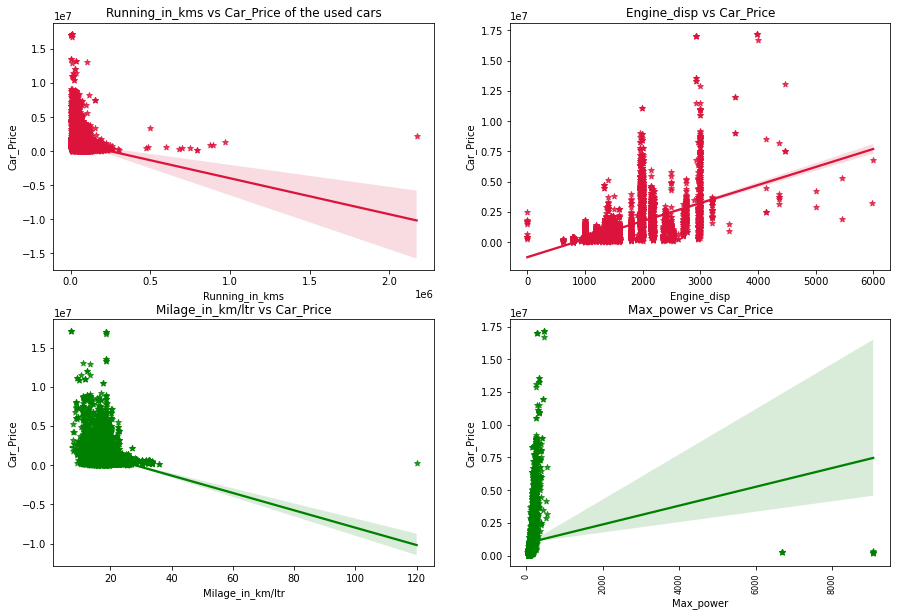

In [110]:
# Visualizing Numerical Variables vs Car_Price


plt.figure(figsize=(15,10))

# Comparing Car_Price and 'Running_in_kms' of the used cars
plt.subplot(2,2,1)
sns.regplot(x= df['Running_in_kms'],y= df['Car_Price'],marker="*",color='crimson')
plt.title('Running_in_kms vs Car_Price of the used cars',fontsize=12)

# Comparing Car_Price and 'Engine_disp' of the used cars
plt.subplot(2,2,2)
sns.regplot(x= df['Engine_disp'],y= df['Car_Price'],marker="*",color='crimson')
plt.title('Engine_disp vs Car_Price',fontsize=12)

# Comparing Car_Price and 'Milage_in_km/ltr' of used cars
plt.subplot(2,2,3)
sns.regplot(x= df['Milage_in_km/ltr'],y= df['Car_Price'],marker="*",color='g')
plt.title('Milage_in_km/ltr vs Car_Price',fontsize=12)

# Comparing Car_Price vs 'Max_power' of the cars
plt.subplot(2,2,4)
sns.regplot(x= df['Max_power'],y= df['Car_Price'],marker="*",color='g')
plt.title('Max_power vs Car_Price',fontsize=12)
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

Car_Price vs Running_in_kms: From the plot we can say that the prices of cars are higher for the cars which have less running in kms. We can also notice there is negative linear relation between the price and running of cars.
Car_Price vs Engine_disp: There is a positive correlation between car price and engine displacement. So, we can say as the engine disp or engine cc increases, the price of car also increases.
Car_Price vs Milage_in_km/ltr: The cars having the milage in the range of 10 to 20 km/ltr are having high sale price. From the graph we can also notice there is negative linear/correlation between the price and milage.
Car_Price vs Max_power: Looking at the graph we can say there is positive correlation between car price and maximum engine power so, we can say as maximum power engine increases, the car prices also go on increasing.

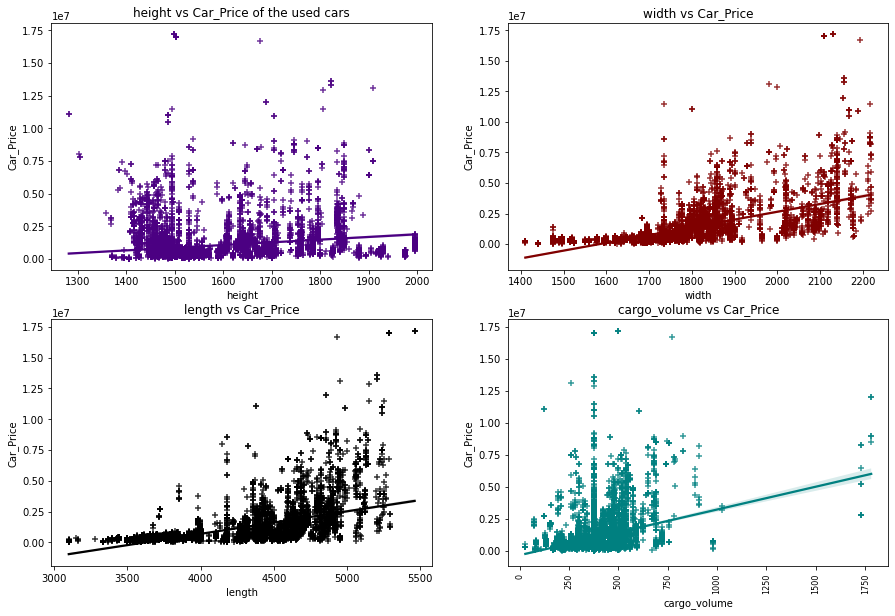

In [111]:
plt.figure(figsize=(15,10))

# Comparing Car_Price and 'height' of the used cars
plt.subplot(2,2,1)
sns.regplot(x= df['height'],y= df['Car_Price'],marker="+",color='indigo')
plt.title('height vs Car_Price of the used cars',fontsize=12)

# Comparing Car_Price and 'width' of the used cars
plt.subplot(2,2,2)
sns.regplot(x= df['width'],y= df['Car_Price'],marker="+",color='maroon')
plt.title('width vs Car_Price',fontsize=12)

# Comparing Car_Price and 'length' of used cars
plt.subplot(2,2,3)
sns.regplot(x= df['length'],y= df['Car_Price'],marker="+",color='k')
plt.title('length vs Car_Price',fontsize=12)

# Comparing Car_Price vs 'cargo_volume' of the cars
plt.subplot(2,2,4)
sns.regplot(x= df['cargo_volume'],y= df['Car_Price'],marker="+",color='teal')
plt.title('cargo_volume vs Car_Price',fontsize=12)
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

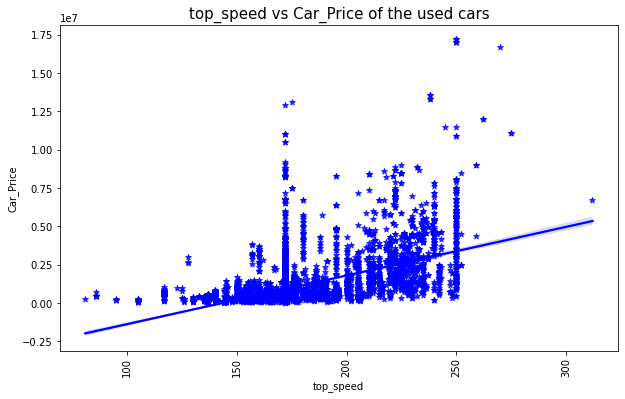

In [112]:
# Comparing Car_Price and 'top_speed' of the used cars
plt.figure(figsize=(10,6))
sns.regplot(x= df['top_speed'],y= df['Car_Price'],marker="*",color='b')
plt.title('top_speed vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Car_Price vs top_speed: From the graph we can notice there is positive linear relation between car price and maximum speed limit of the car. The cars having top speed in the range of 170 km/hr to 250 km/hr having higher price and there are very less number of cars which have top speed below 100km/hr. So, we can conclude that as the maximum speed limit of the car (top_speed) increases, the car price also increases

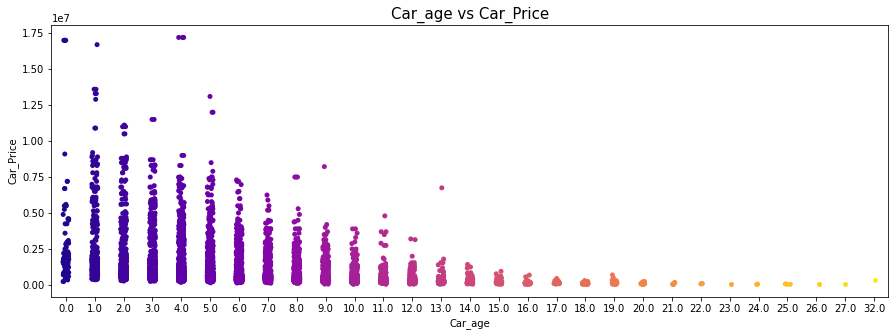

In [113]:
# Comparing Car_Price and 'Car_age' of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Car_age'],df['Car_Price'],palette="plasma")
plt.title('Car_age vs Car_Price',fontsize=15)
plt.show()

Car_Price vs Car_age: From the above strip plot we can say that the older cars are having very lower prices when compared to the new cars that is the cars having very less age. So, there is negative relation between car price and age of the cars and we can conclude as the age decreases, the car prices increases.

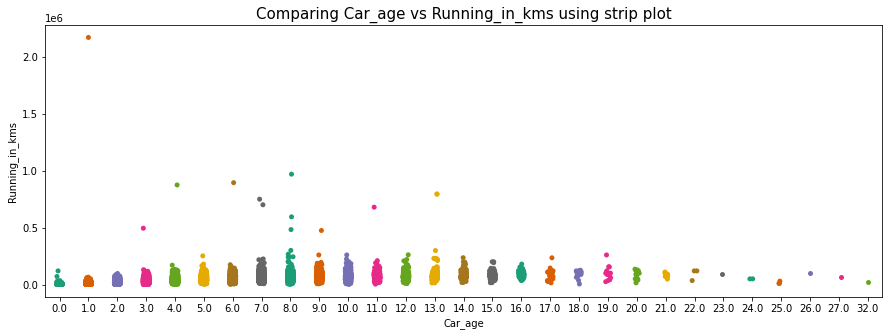

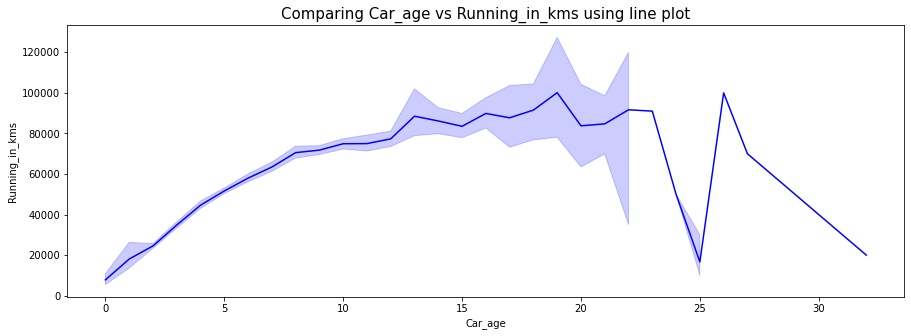

In [115]:
# Checking the relation between car age and running in kms
plt.figure(figsize = (15,5))
sns.stripplot(x = 'Car_age', y = 'Running_in_kms', data = df, palette = "Dark2")
plt.title("Comparing Car_age vs Running_in_kms using strip plot",fontsize=15)

plt.figure(figsize = (15,5))
sns.lineplot(x = 'Car_age', y = 'Running_in_kms', data = df, color = "b")
plt.title("Comparing Car_age vs Running_in_kms using line plot",fontsize=15)
plt.show()
plt.show()

Car_age vs Running_in_kms: The above two graphs represents car_age vs Running in kms. The cars which have their age from 10 years to 20 years are highly used. That is the running kms for these cars are around 1 lakh kms.

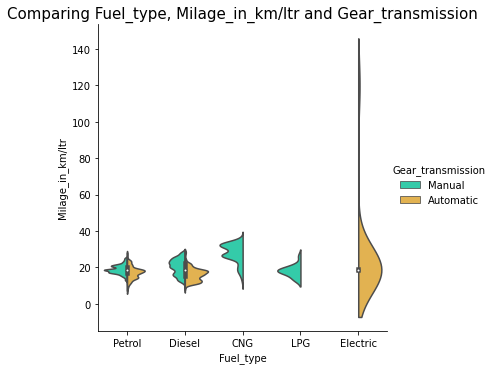

In [116]:
# Lets check the relation between fuel_type, Gear_transmission and Mileage of the cars
sns.catplot(x="Fuel_type", y="Milage_in_km/ltr", hue="Gear_transmission", kind="violin", split=True, palette="turbo", data=df)
plt.title("Comparing Fuel_type, Milage_in_km/ltr and Gear_transmission",fontsize=15)
plt.show()

The above violin plot gives the relation between Milage in km/ltr and Fuel type on the basis of gear transmission. As we can observe the cars with Manual gear transmission which are using CNG as a fuel are having good milage compared to other fuel types.

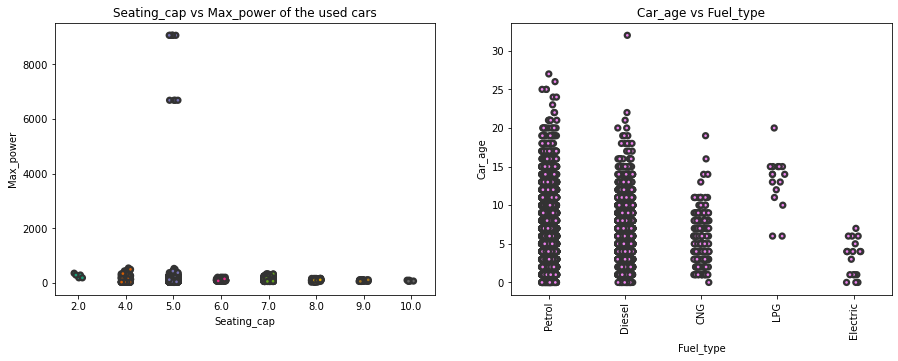

In [117]:
plt.figure(figsize=(15,5))

# Comparing Seating_cap and 'Max_power' of the used cars
plt.subplot(1,2,1)
sns.stripplot(x= df['Seating_cap'],y= df['Max_power'],palette = "Dark2",linewidth=2.3, edgecolor=".2")
plt.title('Seating_cap vs Max_power of the used cars',fontsize=12)

# Comparing Car_age and 'Fuel_type' of the used cars
plt.subplot(1,2,2)
sns.stripplot(x= df['Fuel_type'],y= df['Car_age'],linewidth=2.3, edgecolor=".2",color="violet")
plt.title('Car_age vs Fuel_type',fontsize=12)

plt.xticks(rotation=90)
plt.show()

Seating_cap vs Max_power: The cars with seating capacity 5 have high maximum power of engine used in cars and the cars with 10 seating capacity have very less maximum engine power.
Fuel_type vs Car_age: The cars which are using Petrol and Diesel as fuel they have high age and the cars with low age are using electricity as the fuel.

In [118]:
### MULTIVARIATE ANALYSIS

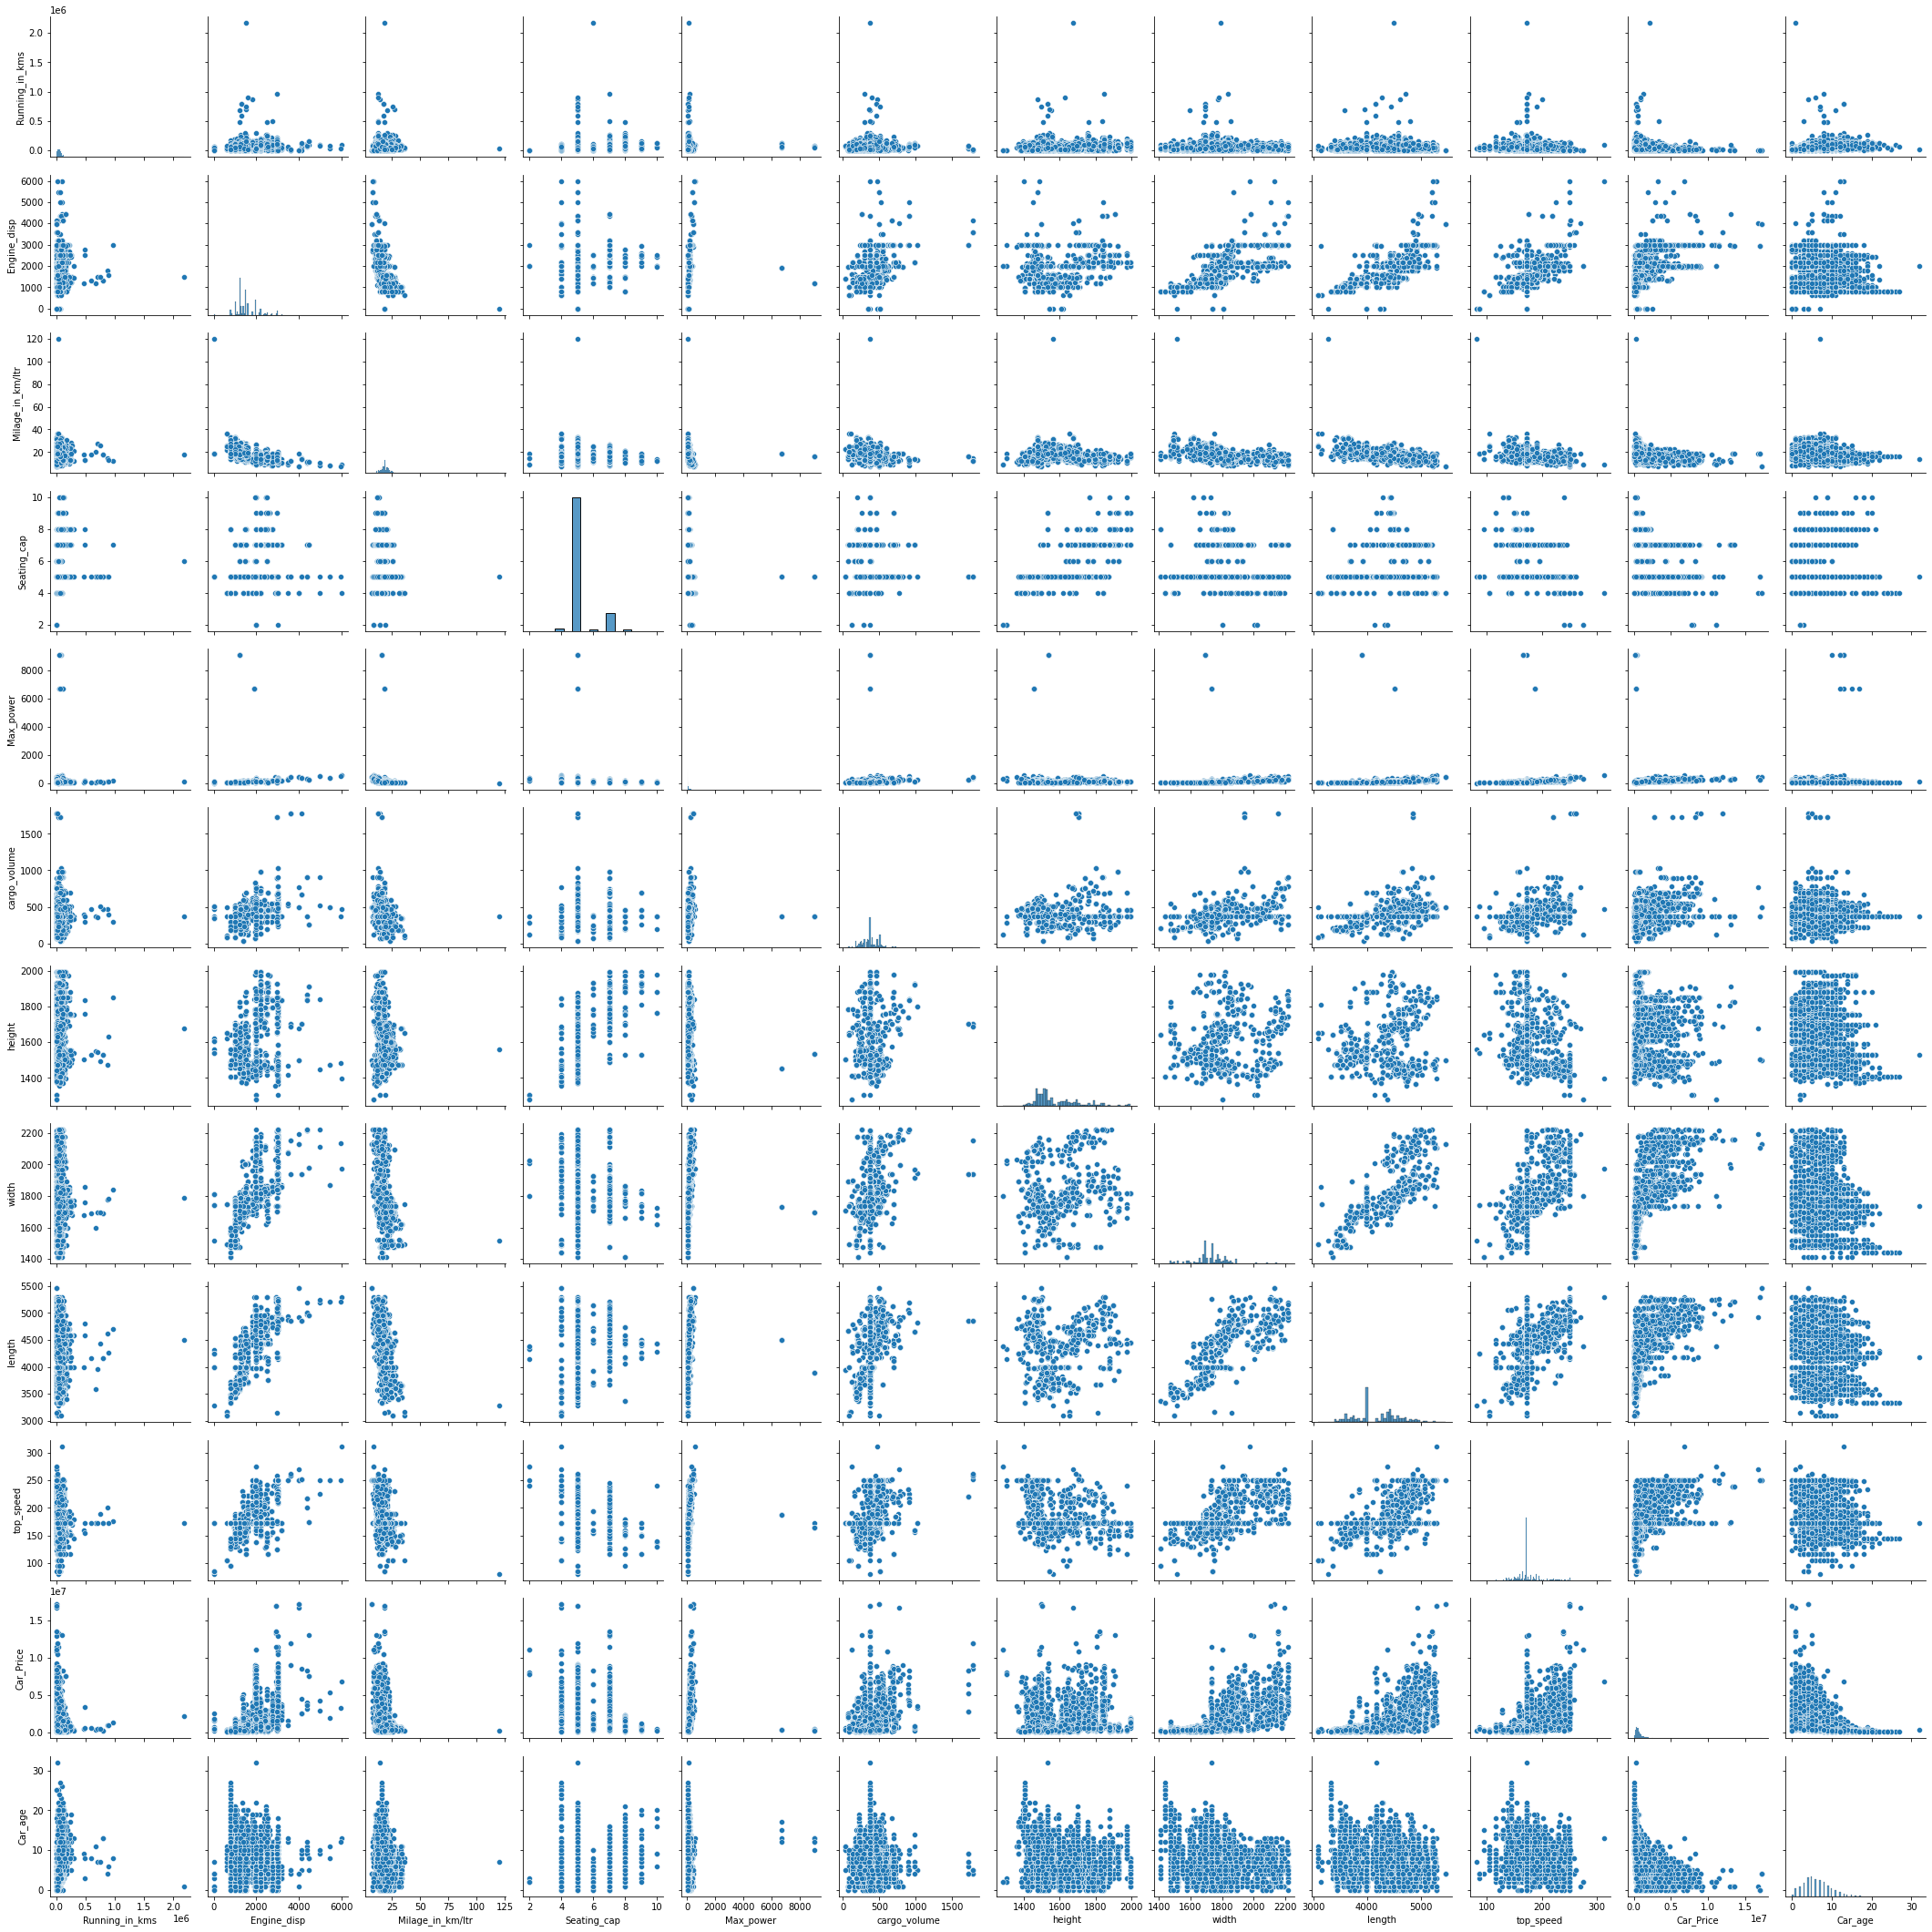

In [119]:
sns.pairplot(df,palette="husl")
plt.show()

The pairplot gives the pairwise relation between the features. On the diagonal we can notice the distribution plots.
From the pair plot we can observe some of the features have strong correlation with each other and some of them have weak correlation with each other.
We can also find some outliers present in the data, we will remove them using appropriate methods.

## OUTLIERS

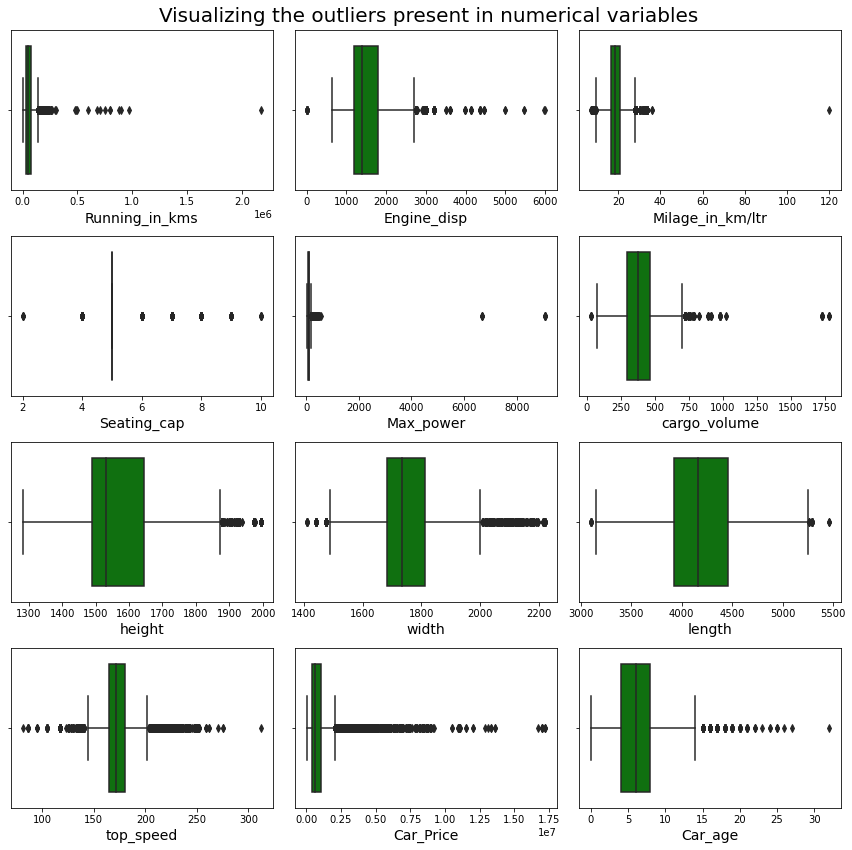

In [121]:
plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the outliers present in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="g")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

From the above box plots we can observe all the columns contains the outliers except "length".
Also the column Car_Price is our target variable, so no need to remove outliers in these two columns. Let's remove the outliers in the remaining columns.

### REMOVING OUTLIERS

In [122]:
# Zscore method

In [123]:
# Features containing outliers
features = df[['Running_in_kms','Engine_disp','Milage_in_km/ltr','Seating_cap','Max_power','cargo_volume','height','width','top_speed','Car_age']]

# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))

In [124]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 

In [125]:
# Checking the shape of dataset before and after removing outliers
print("Shape of dataset before removing outliers:", df.shape)
print("Shape of dataset after removing outliers:", new_df.shape)

Shape of dataset before removing outliers: (10748, 20)
Shape of dataset after removing outliers: (9927, 20)


In [126]:
# Checking the data loss after removing outliers
data_loss = (10748-9927)/10748*100
data_loss

7.638630442873093

By using Zscore I am losing around 7.6386% of data which is acceptable

## SKEWNESS

In [127]:
# Checking the skewness
new_df.skew()

Running_in_kms      0.616776
Engine_disp         1.236400
Milage_in_km/ltr    0.204530
Seating_cap         2.344797
Max_power           1.234486
cargo_volume        0.248233
height              1.130179
width               0.664697
length              0.172766
top_speed           0.944055
Car_Price           3.548235
Car_age             0.557807
dtype: float64

We can find the skewness in all the columns except "Milage_in_km/ltr", "cargo_volume", "length" and "Car_age". Let's remove skewness in the remaining columns.

### Removing skewness 

In [128]:
# yeo-johnson method


In [129]:
# Removing skewness using yeo-johnson  method to get better prediction
skew1 = ["Running_in_kms","Engine_disp","Seating_cap","Max_power","height","width","top_speed"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [130]:
new_df[skew1] = scaler.fit_transform(new_df[skew1].values)

In [131]:
# Checking skewness after using yeo-johnson method
new_df[skew1].skew()

Running_in_kms   -0.067702
Engine_disp       0.300023
Seating_cap      -0.880502
Max_power         0.011740
height            0.000000
width            -0.027002
top_speed        -0.046989
dtype: float64

We can observe the skewness has almost been removed in all the columns but in "Seating_cap". In this column the skewness has been reduced bit, it seems that the data in this column may be important so keeping it as it is. The column "height" has zero skewness which means it contains only unique entry that is zero throughout the dataset, So we can drop this column.

In [132]:
# Dropping irrelevant colum
new_df.drop("height",axis=1,inplace=True)

## Encoding the categorical columns

In [133]:
#Label Encoder Method

In [134]:
# Converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)


In [135]:
# Displaying the categorical columns after encoding 
new_df[categorical_col].head()

,Model,Brand,Fuel_type,Gear_transmission,color,front_brake_type,rear_brake_type,Location
0,209,18,4,1,362,2,4,1
1,25,18,4,1,326,6,4,1
2,209,18,1,1,302,6,4,1
3,192,18,1,1,353,6,1,1
4,64,12,4,0,155,2,1,1


## CORRELATION

In [136]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,width,length,top_speed,Car_Price,Location,Car_age
Model,1.000000,0.113867,-0.034330,0.032737,-0.075074,0.127202,0.031839,0.048025,0.024821,-0.071352,-0.011857,-0.046879,-0.112692,-0.012067,-0.156655,-0.089397,-0.106930,0.027658,0.022582
Brand,0.113867,1.000000,-0.050879,0.020744,0.018785,0.051199,-0.015291,0.167180,-0.028603,-0.096897,0.042189,-0.023676,-0.074379,-0.029793,0.017465,-0.178796,-0.008491,0.029956,-0.084283
Fuel_type,-0.034330,-0.050879,1.000000,-0.306846,-0.483364,0.104179,-0.147356,-0.247866,-0.034680,-0.327062,-0.099266,0.088691,-0.200031,-0.424944,-0.378390,-0.194601,-0.283920,0.036233,0.009150
Running_in_kms,0.032737,0.020744,-0.306846,1.000000,0.140492,0.157317,0.031010,0.149692,0.043477,-0.020683,0.161383,0.034477,0.063465,-0.017460,0.073073,-0.014380,-0.279399,-0.003553,0.581844
Engine_disp,-0.075074,0.018785,-0.483364,0.140492,1.000000,-0.392141,-0.584607,0.290874,-0.002200,0.828637,0.087961,-0.190534,0.513520,0.726873,0.803161,0.529934,0.549951,-0.007848,0.014159
Gear_transmission,0.127202,0.051199,0.104179,0.157317,-0.392141,1.000000,0.339109,0.025153,0.041174,-0.517508,-0.000926,0.179259,-0.287545,-0.432943,-0.429018,-0.423309,-0.528649,-0.011148,0.179452
Milage_in_km/ltr,0.031839,-0.015291,-0.147356,0.031010,-0.584607,0.339109,1.000000,-0.214676,-0.007704,-0.601472,0.019777,0.167118,-0.352488,-0.453750,-0.530900,-0.322582,-0.340466,-0.018140,-0.125528
Seating_cap,0.048025,0.167180,-0.247866,0.149692,0.290874,0.025153,-0.214676,1.000000,0.056452,0.148129,0.039806,-0.015781,0.003340,0.177957,0.281968,-0.086889,0.092189,0.007711,-0.017635
color,0.024821,-0.028603,-0.034680,0.043477,-0.002200,0.041174,-0.007704,0.056452,1.000000,-0.029098,0.007203,0.003045,-0.011325,-0.018969,-0.021241,-0.047357,-0.044757,-0.044985,0.006204
Max_power,-0.071352,-0.096897,-0.327062,-0.020683,0.828637,-0.517508,-0.601472,0.148129,-0.029098,1.000000,-0.001960,-0.277474,0.561337,0.831971,0.867415,0.704624,0.650341,-0.011185,-0.131365


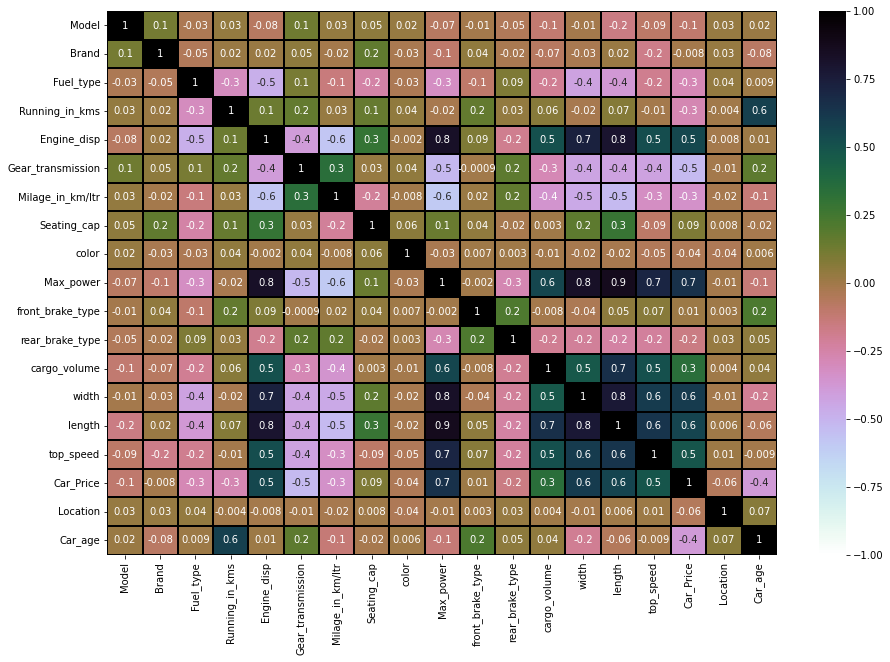

In [137]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="cubehelix_r")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature to other.

This heat map contains both positive and negative correlation.

From the heat map we can notice that the dark shades are highly positively correlated and light shades are highly negatively correlated with the target variable.
The columns "Max_power", "width", "length", "Engine_disp", "top_speed" and "cargo_volume" have strong positive relation with the target variable "Car_Price".
The other columns like "Running_in_kms", "Gear_transmission", "Car_age", "rear_brake_type", "Fuel_type", "Milage_in_km/ltr" etc are highly negatively correlated with the target variable "Car_Price".
We can observe from the map that most of the columns are highly correlated with each other which leads to multicollinearity problem.So, we will check the VIF value and remove the columns having high VIF value to overcome with this multicollinearity problem.

In [ ]:
# Checking the positive and negative relation between label and features 
cor['Car_Price'].sort_values(ascending=False)

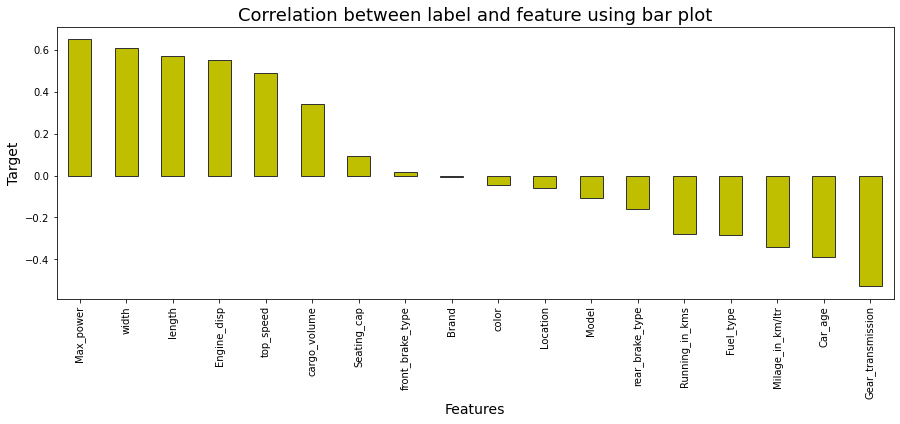

In [139]:
# Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(15,5))
new_df.corr()['Car_Price'].sort_values(ascending=False).drop(['Car_Price']).plot(kind='bar',color='y',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the bar plot we can clearly observe the positive and negative correlation between the label and features. Here the column "color" is less correlated with the label compared to others, we can drop this columns if necessary but for now let's keep it as it is.

## Separating the feature and label into x and y

In [140]:
#Separating both dependent and independent variables.
x = new_df.drop("Car_Price", axis=1)
y = new_df["Car_Price"]

In [141]:
# Dimension of x and y
x.shape, y.shape


((9927, 18), (9927,))

In [142]:
# Feature Scaling Using StandardScaler

In [143]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
x = pd.DataFrame(scaling.fit_transform(x), columns=x.columns)
x.head()

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,width,length,top_speed,Location,Car_age
0,0.872773,0.378591,0.792266,-1.625255,-0.579227,0.630070,0.622786,-0.229486,1.044397,-0.532492,-0.724217,0.262276,-0.931852,0.062031,-0.797911,-0.054877,-1.565006,-0.98196
1,-1.382709,0.378591,0.792266,-0.795763,-1.137487,0.630070,1.389947,-0.229486,0.740085,-1.184789,1.383002,0.262276,-1.722452,-2.025443,-1.551317,-1.704215,-1.565006,-0.68353
2,0.872773,0.378591,-1.236842,0.932379,-0.445688,0.630070,1.739929,-0.229486,0.537211,-0.853678,1.383002,0.262276,-1.487878,0.062031,-0.797911,-1.034261,-1.565006,-0.08667
3,0.664386,0.378591,-1.236842,-0.104376,0.389615,0.630070,1.039965,-0.229486,0.968319,0.539992,1.383002,-1.681200,-0.193379,0.304647,0.376891,0.349030,-1.565006,0.21176
4,-0.904645,-0.397965,0.792266,-0.620559,-0.144432,-1.587125,-0.835939,-0.229486,-0.705395,1.320209,-0.724217,-1.681200,0.284456,0.712835,0.619514,0.631722,-1.565006,-0.98196


We have scaled the data using StandardScaler method to overcome with the issue of data biasness and displayed the data of independent variables after scaling.

As we have observed in the heat map there is multicollinearity issue exists in the data, So let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns in order to overcome with the multicollinearity issue.

## CHECKING VIF

In [144]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.133713,Model
1,1.180301,Brand
2,2.494943,Fuel_type
3,1.856018,Running_in_kms
4,5.296379,Engine_disp
5,1.472995,Gear_transmission
6,3.085731,Milage_in_km/ltr
7,1.477926,Seating_cap
8,1.015784,color
9,9.736068,Max_power


We can observe the column "Max_Power" has VIF close to 10 that means it is causing multicollinearity problem. Let's drop the feature having high VIF value amongst all the columns.

In [145]:
# Dropping Max_power column as it contains high VIF value
x.drop(["Max_power"],axis=1,inplace=True)


In [146]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) 
                     for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,1.118687,Model
1,1.119873,Brand
2,2.494011,Fuel_type
3,1.855761,Running_in_kms
4,4.616198,Engine_disp
5,1.440519,Gear_transmission
6,2.902378,Milage_in_km/ltr
7,1.433099,Seating_cap
8,1.015149,color
9,1.171188,front_brake_type


Now we are overcome with the multicollinearity issue as the VIF values are less than 10 in all the columns.

We have successfully completed preprocessing and data cleaning in the dataset. Now it is time to build my machine learning models.

## MACHINE LEARNING/ MODEL BUILDING

#### Finding the Best Random State and Accuracy

In [147]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9730735210283178  on Random_state  18


With the help of random state selection process we have found our random state to be 18 amongst 1-1000 with best accuracy as 97.3165% using Random Forest Regressor.

## FEATURE IMPORTANCE

In [148]:
#Lets check the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
Engine_disp,0.374
Car_age,0.191
width,0.143
length,0.087
top_speed,0.072
Gear_transmission,0.031
Running_in_kms,0.021
cargo_volume,0.017
Brand,0.017


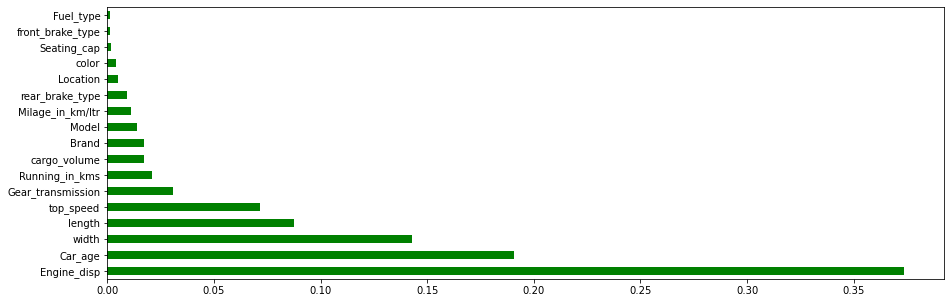

In [149]:
plt.figure(figsize=(15,5))
importances=pd.Series(RFR.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="g")
plt.show()

Here with the help of RandomForestRegressor we are able to list down the importance given to a column as per it's involvement in predicting our label. Here the column "Engine_disp"contributing more for prediction which means this feature is important for the predictions

In [150]:
#TRAIN TEST SPLIT

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=18)

### ML Regression Algorithms with Evaluation Metrics

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

### DecisionTreeRegressor

R2_Score: 94.39329822338473
Mean Absolute Error: 117609.54414232964
Mean Squared Error: 57969917884.8278
Root Mean Squared Error: 240769.42888337755

Cross Validation Score: 89.70644645649101

R2 Score - Cross Validation Score is 4.686851766893724


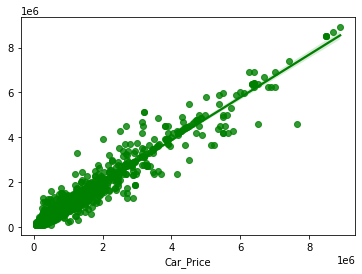

In [154]:

# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
R2_score = r2_score(y_test,predDTR)*100    
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predDTR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predDTR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Cross Validation Score
cv_score = (cross_val_score(DTR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)
# Visualizing the predicted values
sns.regplot(y_test,predDTR,color="g")
plt.show()

### Random Forest Regressor

R2_Score: 97.39691849662015
Mean Absolute Error: 89878.74968621622
Mean Squared Error: 26914294180.551517
Root Mean Squared Error: 164055.76545964947

Cross Validation Score: 94.09751999201205

R2 Score - Cross Validation Score is 3.2993985046080923


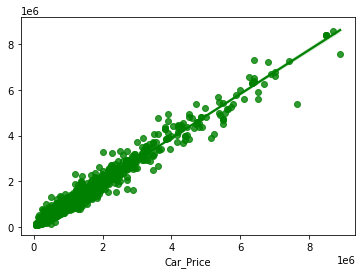

In [156]:

# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
R2_score = r2_score(y_test,predRFR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predRFR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predRFR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predRFR))) 

# Cross Validation Score
cv_score = (cross_val_score(RFR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="g")
plt.show()

### Extra Trees Regressor

R2_Score: 97.46624528116968
Mean Absolute Error: 86488.48311849614
Mean Squared Error: 26197497003.23102
Root Mean Squared Error: 161856.40859487467

Cross Validation Score: 94.81685685457002

R2 Score - Cross Validation Score is 2.649388426599657


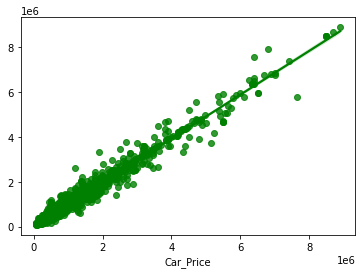

In [157]:

# Checking R2 score for Extra Trees Regressor
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
R2_score = r2_score(y_test,predXT)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXT))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXT))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXT))) 

# Cross Validation Score
cv_score = (cross_val_score(XT, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="g")
plt.show()

### GradientBoosting Regressor

R2_Score: 95.18913117859363
Mean Absolute Error: 127215.75137615621
Mean Squared Error: 49741484680.850624
Root Mean Squared Error: 223027.99080126832

Cross Validation Score: 92.51935889635038

R2 Score - Cross Validation Score is 2.669772282243244


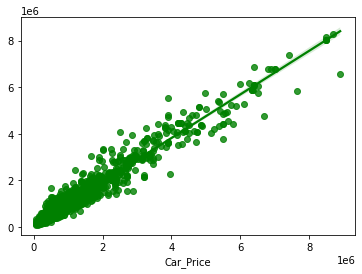

In [158]:

# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
R2_score = r2_score(y_test,predGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predGB))) 

# Cross Validation Score
cv_score = (cross_val_score(GB, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)
# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="g")
plt.show()

### Extreme Gradient Boosting Regressor (XGB)

R2_Score: 97.52630712181826
Mean Absolute Error: 81800.91661585525
Mean Squared Error: 25576493762.978138
Root Mean Squared Error: 159926.52613928102

Cross Validation Score: 94.53875723551857

R2 Score - Cross Validation Score is 2.987549886299689


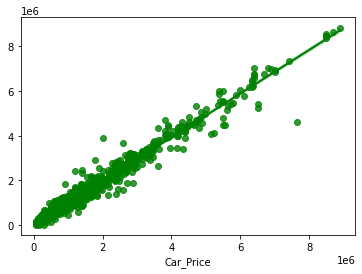

In [160]:

# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb
XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
R2_score = r2_score(y_test,predXGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXGB))) 

# Cross Validation Score
cv_score = (cross_val_score(XGB, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="g")
plt.show()

### Bagging Regressor

R2_Score: 96.87969578058797
Mean Absolute Error: 97266.10101823878
Mean Squared Error: 32262065396.350777
Root Mean Squared Error: 179616.43966060228

Cross Validation Score: 93.86407466632039

R2 Score - Cross Validation Score is 3.0156211142675744


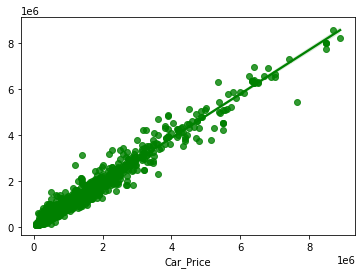

In [161]:

# Checking R2 score for BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
R2_score = r2_score(y_test,predBR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predBR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predBR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predBR))) 
# Cross Validation Score
cv_score = (cross_val_score(BR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="g")
plt.show()


### KNeighbors Regressor

R2_Score: 92.11512086499393
Mean Absolute Error: 143899.02369922792
Mean Squared Error: 81524898986.87535
Root Mean Squared Error: 285525.6538156867

Cross Validation Score: 88.06621920073783

R2 Score - Cross Validation Score is 4.048901664256093


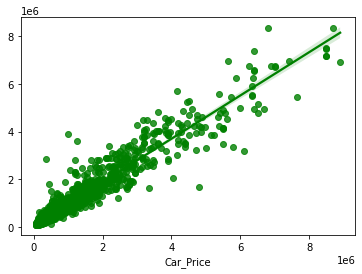

In [162]:

# Checking R2 score for KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
R2_score = r2_score(y_test,predknn)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predknn))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predknn))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predknn))) 

# Cross Validation Score
cv_score = (cross_val_score(knn, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predknn,color="g")
plt.show()

## MODEL SELECTION

Model		R2_Score		Cross_Validation_Score		Difference
DecisionTreeRegressor		94.456		89.978		4.477
RandomForestRegressor		97.273		94.051		3.222
ExtraTreesRegressor		97.281		94.742		2.538
GradientBoostingRegressor		95.187		92.508		2.679
XGBRegressor		97.526		94.538		2.987
BaggingRegressor		96.688		93.314		3.374
KNeighborsRegrassor		92.112		88.065		4.047

From the difference between R2 score and Cross Validation score, it can be seen that the ExtraTreesRegressor has least difference and low evaluation metrics compared to other models. That is XGBRegressor as a regression gave the best R2 score, MAE, MSE and RMSE values. So we can conclude that XGB Regressor as our best fitting model. Let's try to increase our model score by tuning the best model using different types of hyper parameters.

#### HYPER PARAMETER TUNING

In [163]:
# Let's Use the GridSearchCV to find the best paarameters in XGBRegressor
from sklearn.model_selection import GridSearchCV

#XGB Regressor
parameters = {'n_estimators' : [50,100,150,200],
              'learning_rate': [0.05,0.1,0.2,0.3,0.4],
              'gamma' : [0,0.1,0.2],
              'max_depth' : [4, 6, 8,10]}

In [164]:
GCV=GridSearchCV(xgb(),parameters,cv=5)

In [165]:
# Running GridSearchCV
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat..._step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [166]:
# Finding best parameters
GCV.best_params_

{'gamma': 0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}

#### FINAL MODEL

R2_Score: 97.55118677506731
Mean absolute error: 88418.9916203791
Mean squared error: 25319253140.359993
Root Mean Squared error: 159120.24742426715


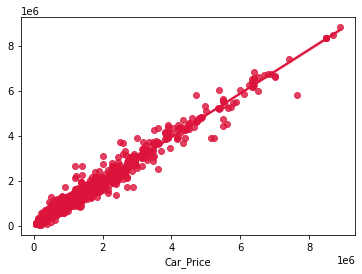

In [167]:
# Creating final model
Car_price_model = xgb(gamma=0, learning_rate=0.2, max_depth=4, n_estimators=200)

# Prediction
Car_price_model.fit(x_train, y_train)
pred = Car_price_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

# Metric Evaluation
print('Mean absolute error:',metrics.mean_absolute_error(y_test, pred))
print('Mean squared error:',metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Visualizing the predicted values
sns.regplot(y_test,pred,color="crimson")
plt.show()

In [168]:
# Final Cross Validation Score
final_cv_score = (cross_val_score(Car_price_model, x, y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 94.92659376632966


#### SAVING FINAL MODEL

In [169]:
# Saving the model using joblib library 
import joblib
joblib.dump(Car_price_model,"Used_Car_Price_Prediction.pkl")


['Used_Car_Price_Prediction.pkl']

In [170]:
# Loading the saved model
Model=joblib.load("Used_Car_Price_Prediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([ 681073.4 ,  297298.  ,  755197.2 , ..., 1257253.2 ,  500190.12,
        487981.94], dtype=float32)

In [171]:
## PREDICTION CONCLUSION

In [172]:
Predicted_Used_Car_Price = pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
Predicted_Used_Car_Price

0         1            2              3          4     \
Predicted  681073.375  297298.0  755197.1875  160797.734375  5343953.0   
Original   738000.000  285000.0  825000.0000  120000.000000  5550000.0   

                 5           6            7            8           9     \
Predicted  251659.625  650220.625  343878.0625  870003.8125  849558.625   
Original   250000.000  599000.000  310000.0000  875000.0000  935000.000   

                   10          11          12          13          14    \
Predicted  288860.09375  1123404.75  632349.375  562915.625  430754.625   
Original   245000.00000  1135000.00  625000.000  565000.000  350000.000   

                  15             16          17         18           19    \
Predicted  1097946.375  257331.640625  942247.625  4260774.0  618533.9375   
Original   1400000.000  265000.000000  890000.000  4390000.0  699000.0000   

                   20         21        22            23           24    \
Predicted  450312.65625  1610710.5  471246.0  405685.15625  78713.59375   
Original   490000.00000  1725000.0  420000.0  321000.00000  79500.00000   

                  25         26            27             28          29    \
Predicted   870842.125  1230522.0  301526.09375  186859.921875  783382.375   
Original   1250000.000  1447000.0  290000.00000  177000.000000  721000.000   

                  30          31            32           33           34    \
Predicted  1256918.125  736401.375  210424.96875  643740.9375  988677.8125   
Original   1150000.000  695000.000  190000.00000  671000.0000  970000.0000   

                    35         36        37         38           39    \
Predicted  161679.234375  2420803.5  609145.5  1293747.0  338619.0625   
Original   145000.000000  1901000.0  610000.0  1445000.0  361000.0000   

               40            41          42            43         44    \
Predicted  432204.0  498417.28125  3445633.75  339568.46875  547166.75   
Original   465000.0  545000.00000  3199000.00  301000.00000  595000.00   

                45            46           47         48          49    \
Predicted  1794299.5  434866.03125  647756.8125  922608.25  471560.125   
Original   1834000.0  425000.00000  595000.0000  975000.00  381000.000   

                 50          51           52         53           54    \
Predicted  753159.875  461552.125  380399.9375  4781101.0  1933815.125   
Original   760000.000  399000.000  361000.0000  4800000.0  1380000.000   

                55           56           57          58           59    \
Predicted  1825556.5  394951.5625  421034.1875  426188.625  1732456.875   
Original   1750000.0  365000.0000  320000.0000  370000.000  1445000.000   

                   60           61         62        63             64    \
Predicted  9.861522e+05  512256.6875  1981023.0  861926.0  241858.328125   
Original   1.130000e+06  625000.0000  2250000.0  845000.0  198000.000000   

                   65            66            67            68         69    \
Predicted  475634.46875  405167.40625  338218.09375  434143.78125  1291704.0   
Original   485000.00000  395000.00000  315000.00000  455000.00000  1490000.0   

                70            71          72            73        74    \
Predicted  977123.75  411329.71875  1888005.25  494075.65625  373502.0   
Original   870000.00  385000.00000  1700000.00  550000.00000  360000.0   

                   75         76           77        78         79    \
Predicted  242589.78125  1625395.0  504562.4375  768191.0  6486102.5   
Original   235000.00000  1705000.0  550000.0000  938000.0  6400000.0   

                  80           81            82          83         84    \
Predicted  347723.8125  290981.1875  287218.59375  2601351.75  4115366.5   
Original   345000.0000  290000.0000  290000.00000  2350000.00  4000000.0   

                  85           86           87            88           89    \
Predicted  530781.5625  303255.4375  666025.8125  508776.71875  1059026.875   
Or

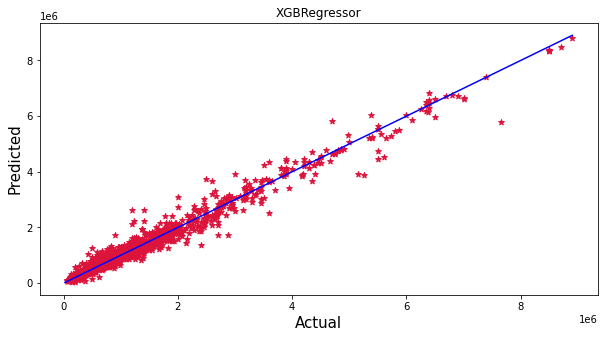

In [173]:
# Visualizing actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson',marker="*")
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()

In [174]:
# Saving the predicted car price values in csv file
Predicted_Used_Car_Price.to_csv("Predicted_Used_Car_Price.csv",index=False)

## CONCLUSION

Best Model for Used Car Price Prediction is found to be XGB with

R2_Score: 97.52630712181826

Mean Absolute Error: 81800.91661585525

Mean Squared Error: 25576493762.978138

Root Mean Squared Error: 159926.52613928102

Cross Validation Score: 94.53875723551857



Final values after hypertuning is found to be

R2_Score: 97.55118677506731

Mean absolute error: 88418.9916203791

Mean squared error: 25319253140.359993

Root Mean Squared error: 159120.24742426715

Cross Validation Score: 94.92659376632966